In [1]:
import cv2 as cv
import numpy as np
from tqdm.notebook import *
import random 
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import string
from torchvision import datasets, transforms,utils
from PIL import Image,ImageDraw
import torch.optim as optim
flag='flag{67373_UPUP_FAFA}'
transform1 = transforms.Compose([transforms.ToTensor(), ]) # range [0, 255] -> [0.0,1.0]
transform2 = transforms.Compose([transforms.ToTensor(),  transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))])  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
iw=125
ih=12
image_size =iw*ih

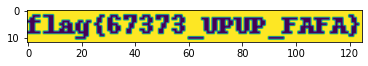

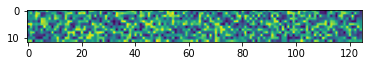

In [2]:
def creageimg(strx=''):
    img = Image.fromarray(np.zeros((12, 125, 3), np.uint8))
    ImageDraw.Draw(img).text((0, 0), strx, (random.randint(32,255),255,255))
    return 255-np.asarray(img)[:,:,0]
def createrand():
    return np.random.rand(12,125)*255//1

plt.imshow(creageimg(flag))
plt.show()
plt.imshow(createrand())
plt.show()

In [13]:
hidden_size = 1024
'''-----------------判别器（Discriminator)-----------------'''
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())
D = D.to(device)
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

In [12]:
'''-----------------生成器（Generator）-----------------'''
G = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())
G = G.to(device)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [14]:
batch_size=4
rflist=[]
for i in range(batch_size*2):
    rflist.append(transform1(creageimg(flag)).numpy())
data_loader = torch.utils.data.DataLoader(dataset=rflist,batch_size=batch_size,shuffle=True)

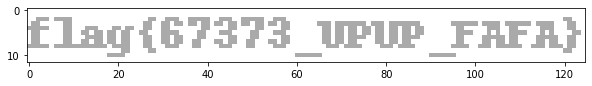

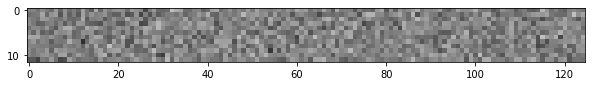

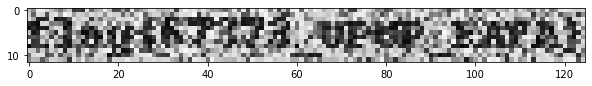

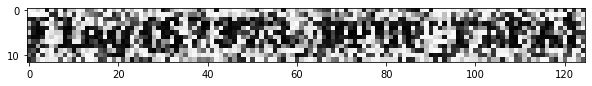

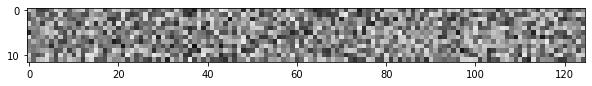

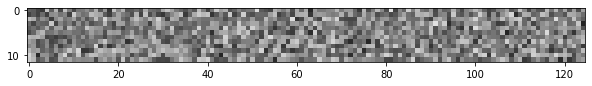

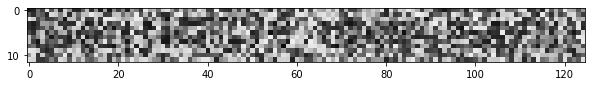

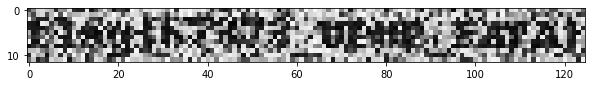

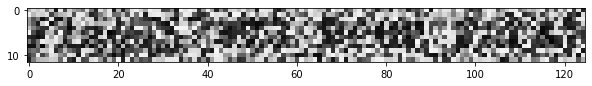

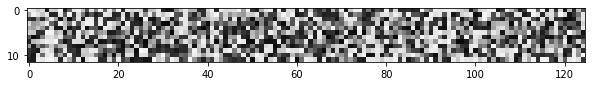

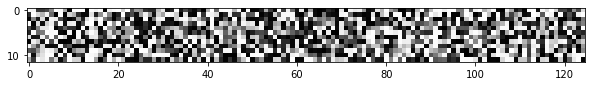

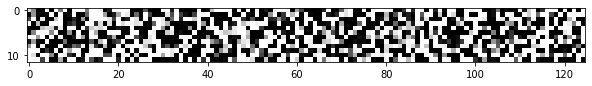

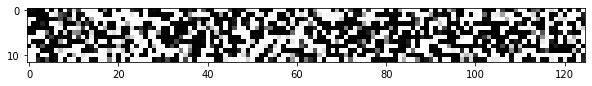

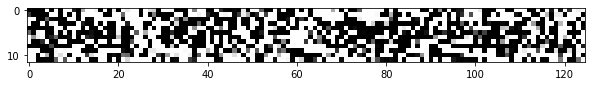

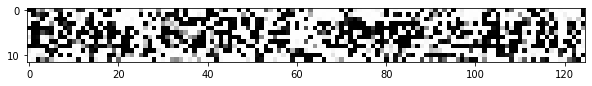

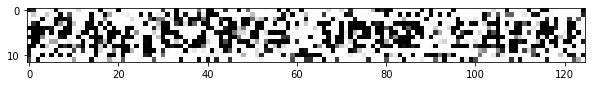

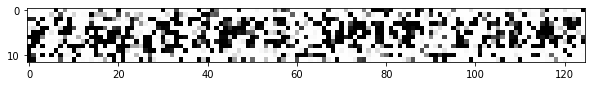

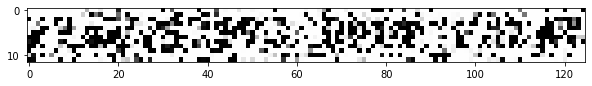

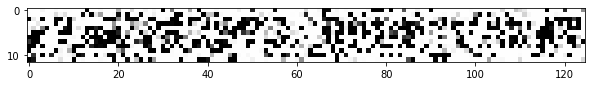

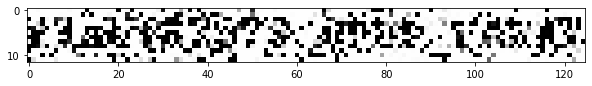

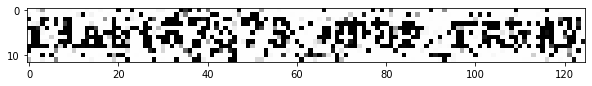

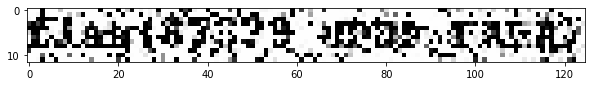

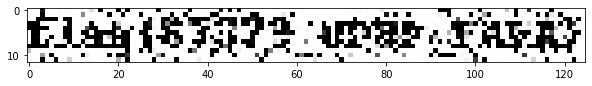

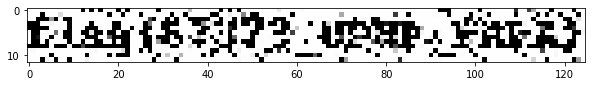

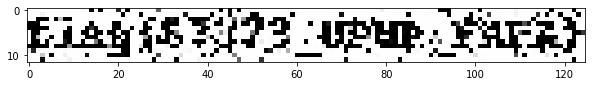

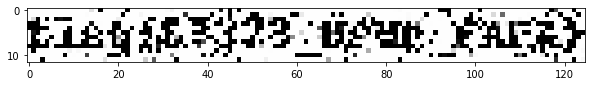

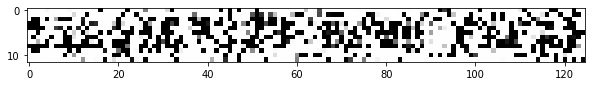

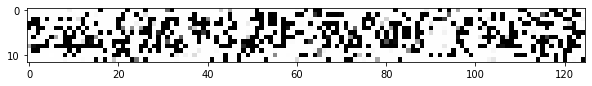

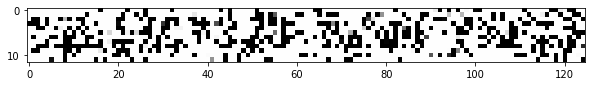

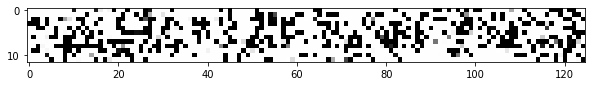

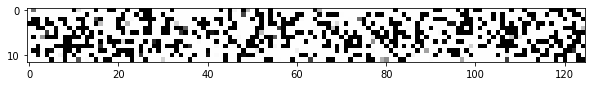

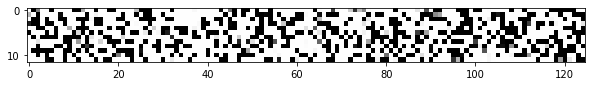

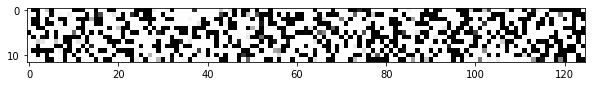

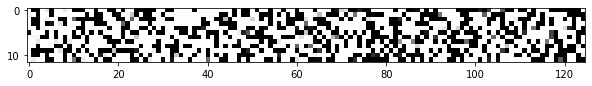

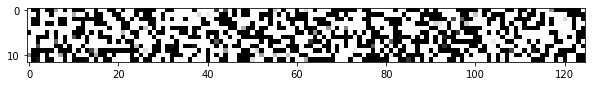

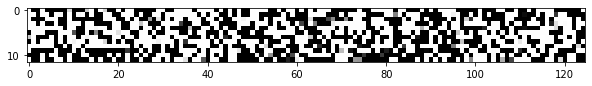

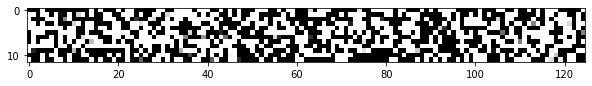

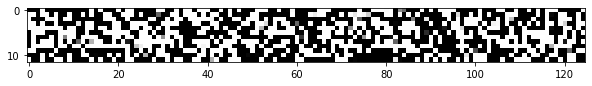

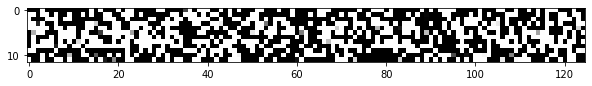

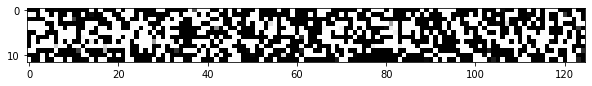

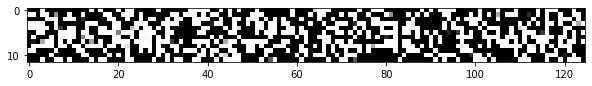

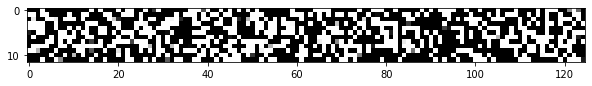

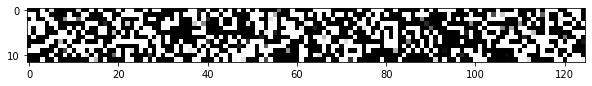

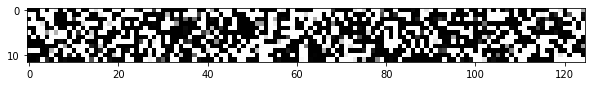

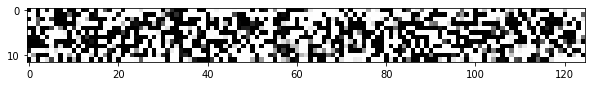

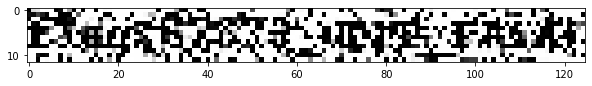

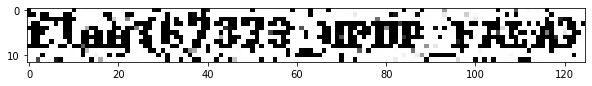

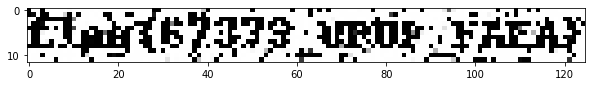

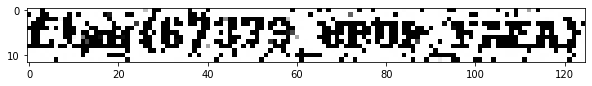

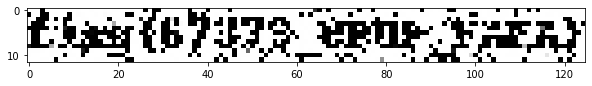

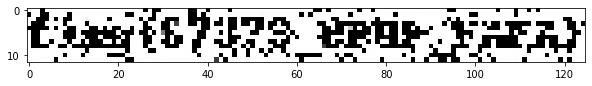

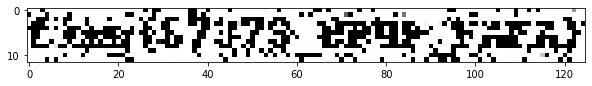

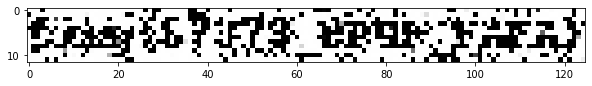

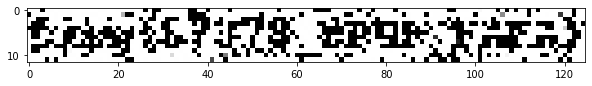

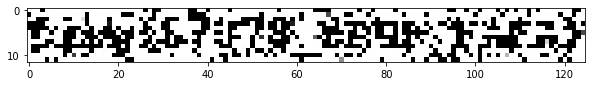

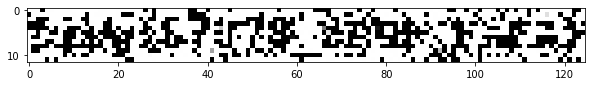

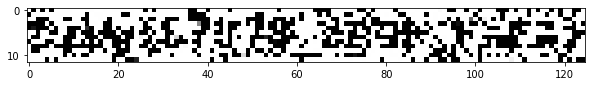

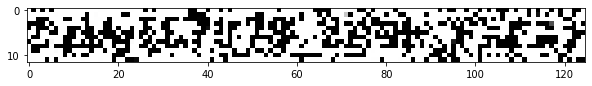

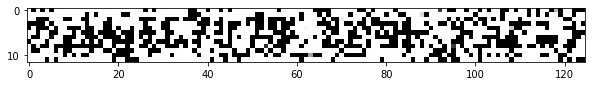

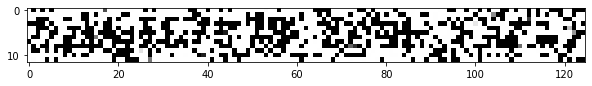

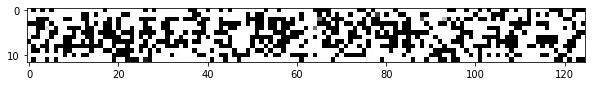

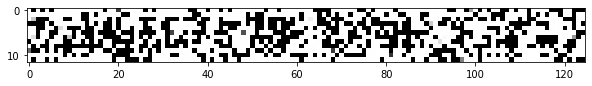

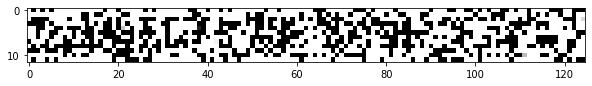

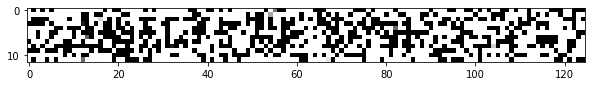

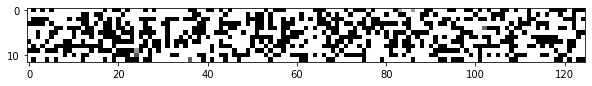

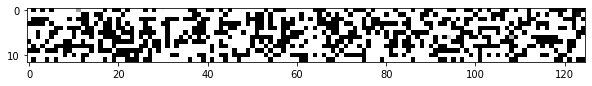

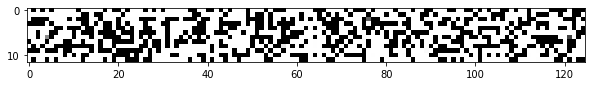

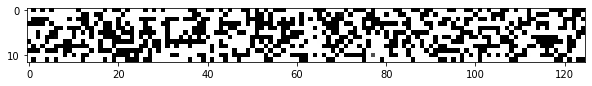

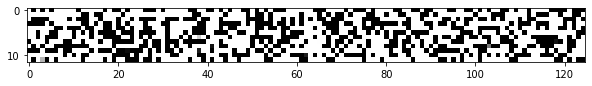

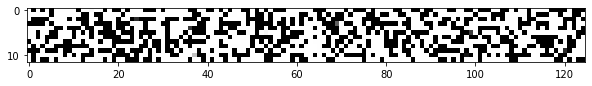

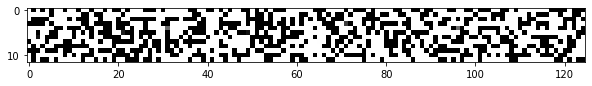

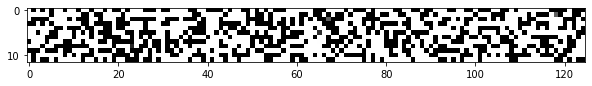

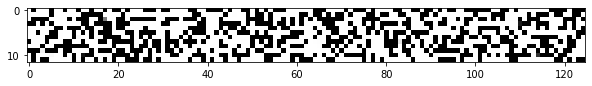

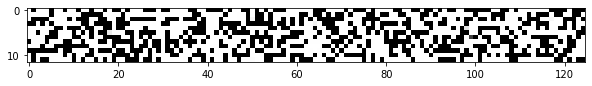

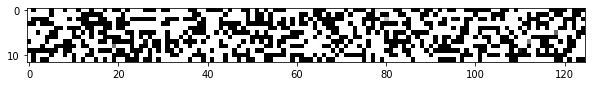

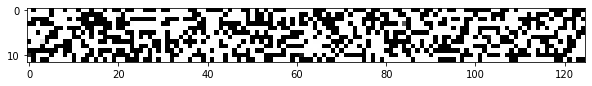

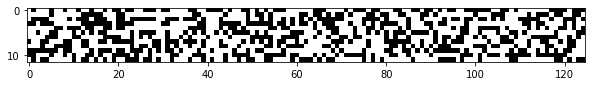

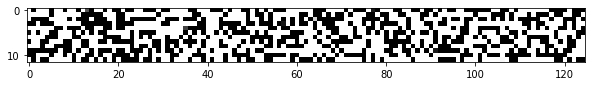

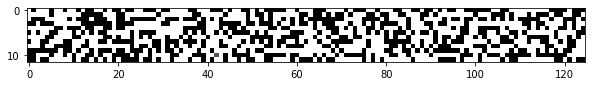

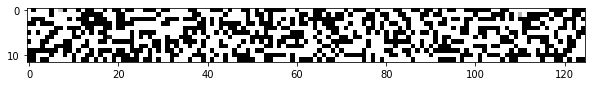

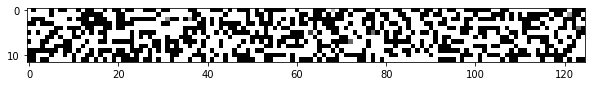

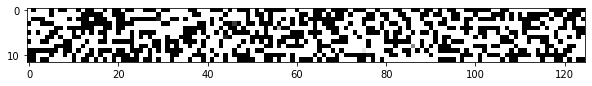

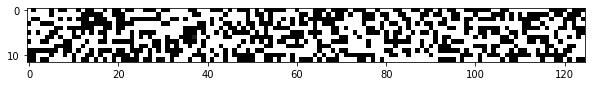

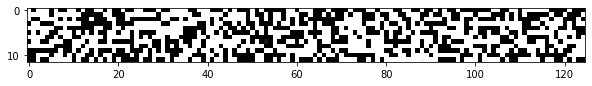

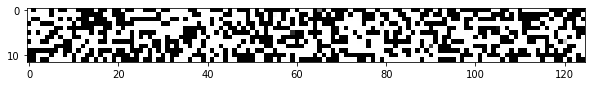

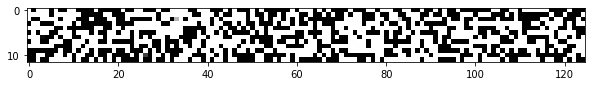

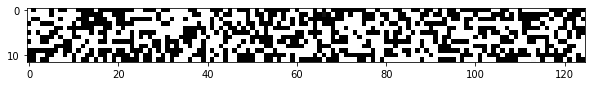

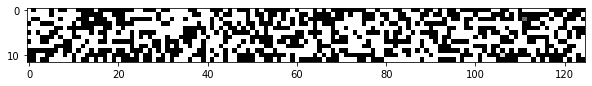

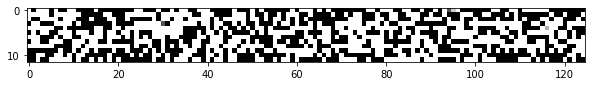

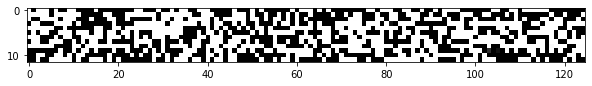

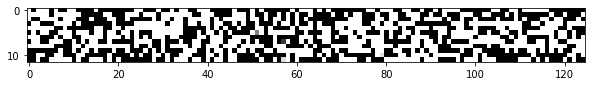

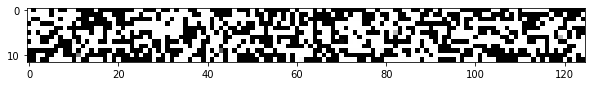

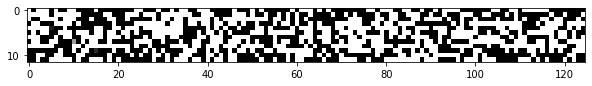

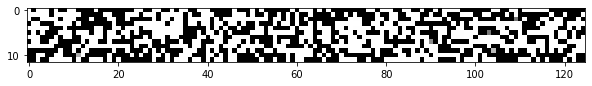

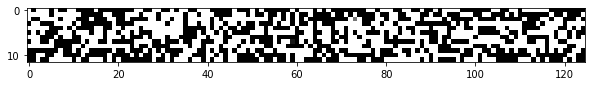

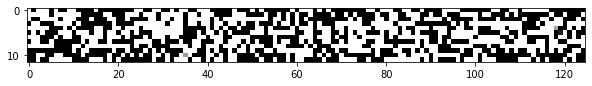

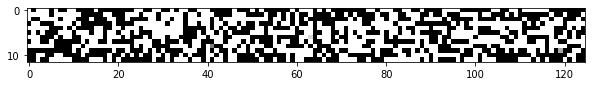

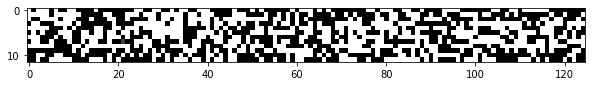

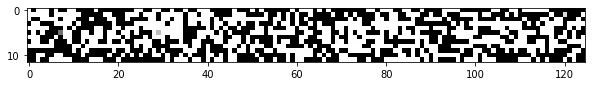

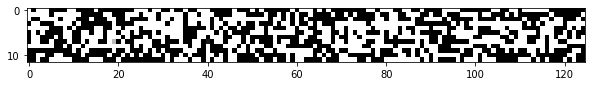

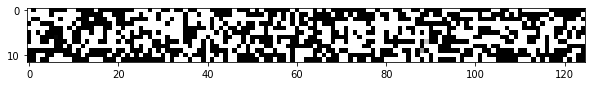

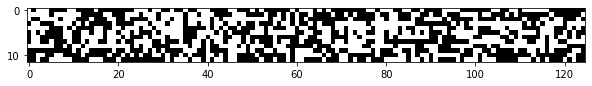

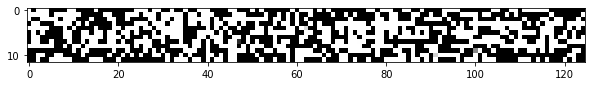

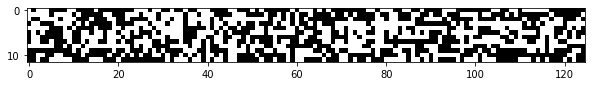

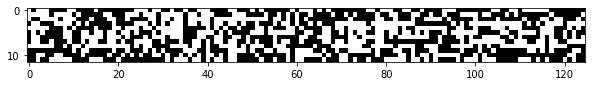

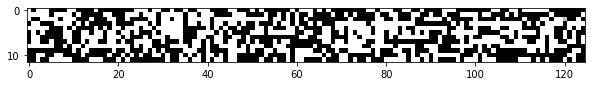

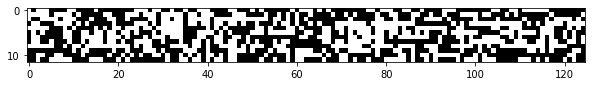

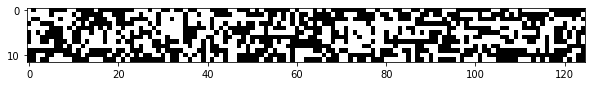

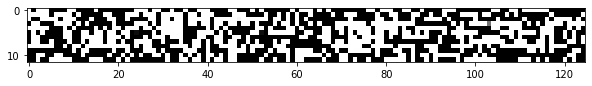

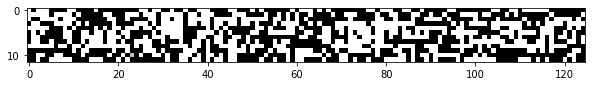

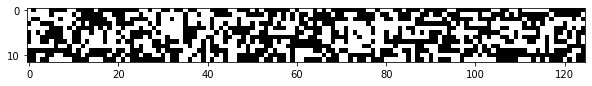

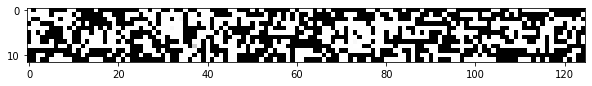

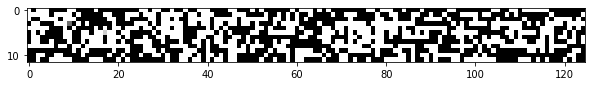

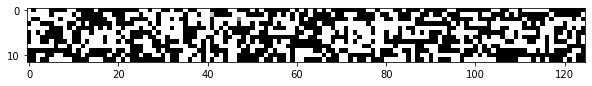

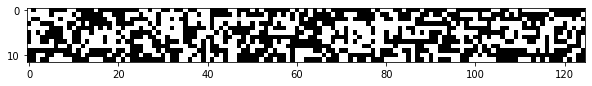

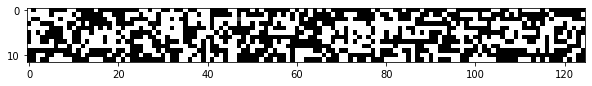

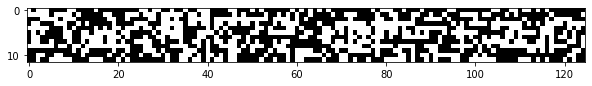

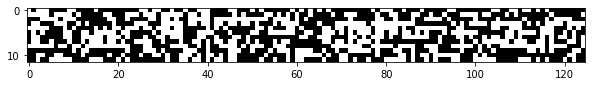

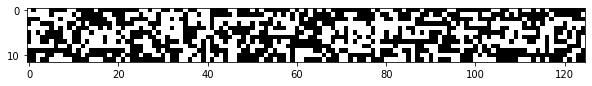

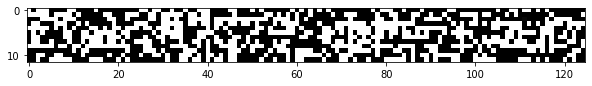

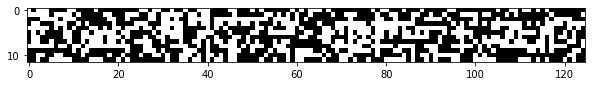

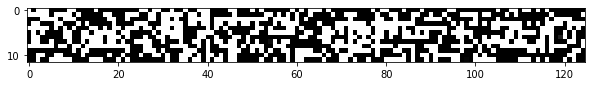

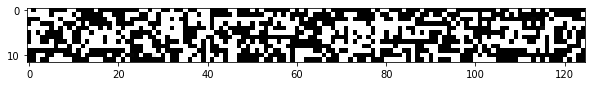

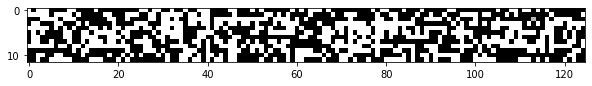

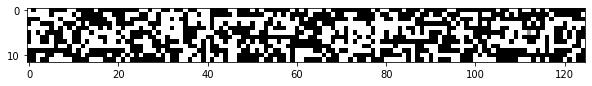

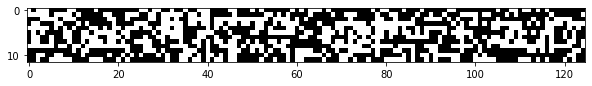

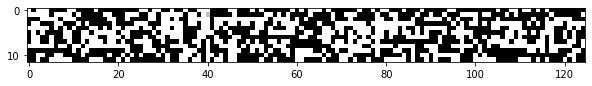

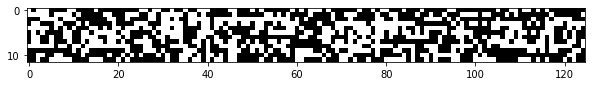

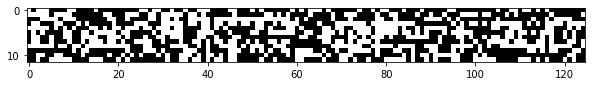

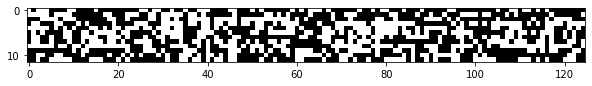

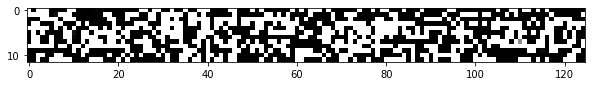

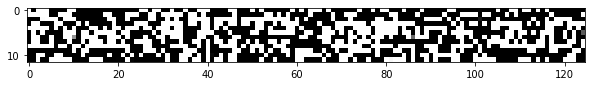

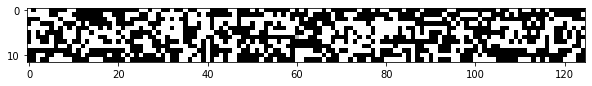

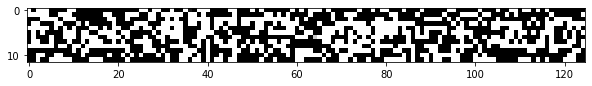

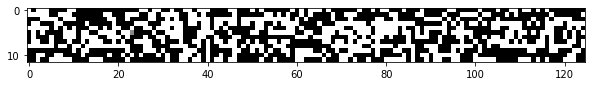

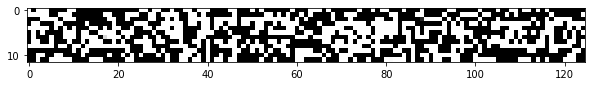

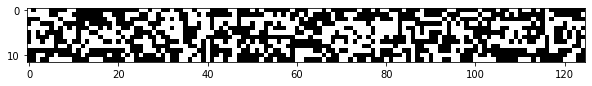

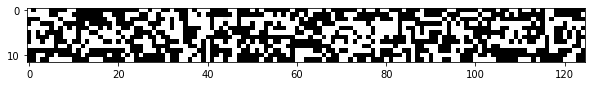

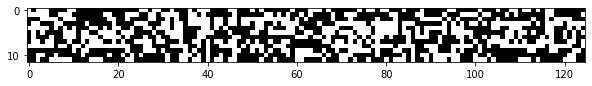

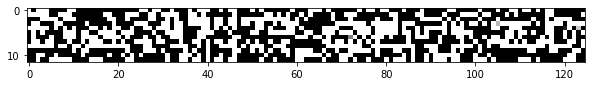

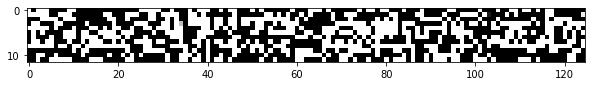

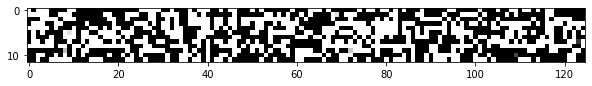

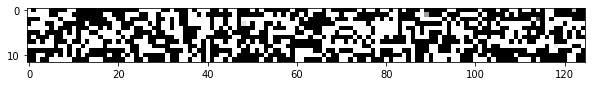

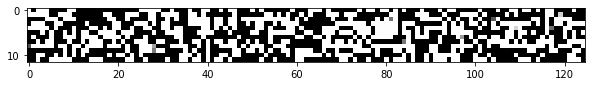

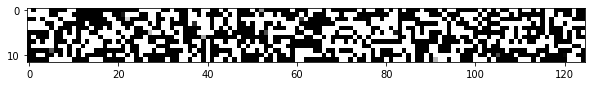

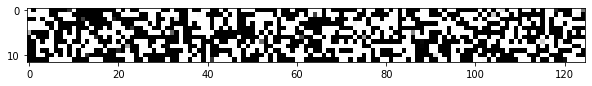

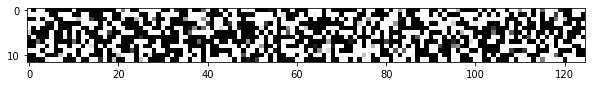

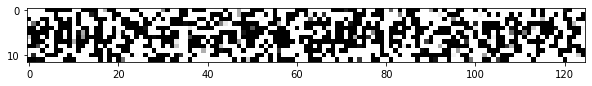

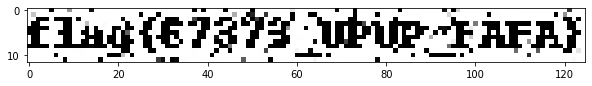

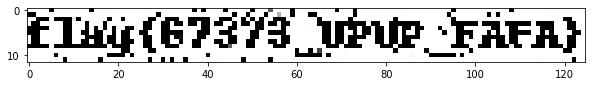

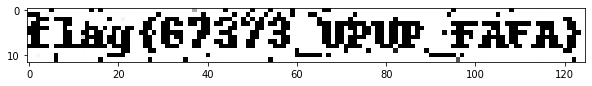

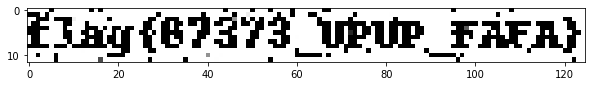

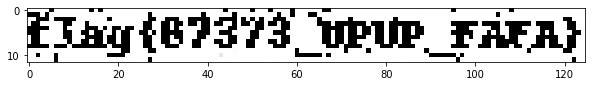

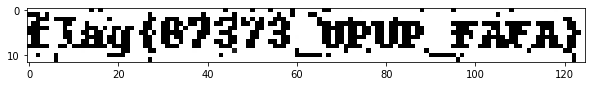

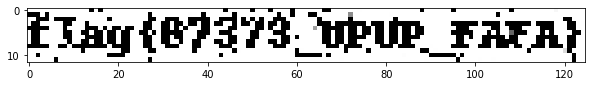

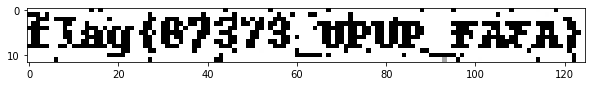

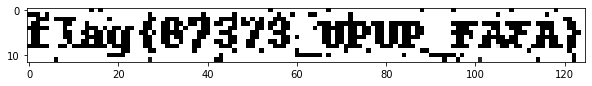

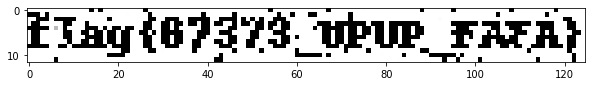

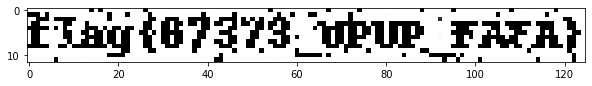

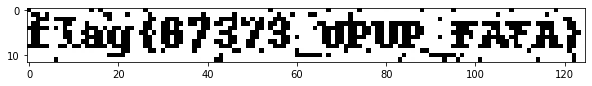

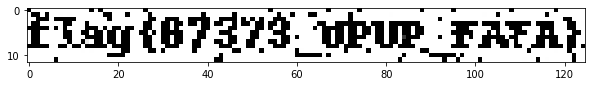

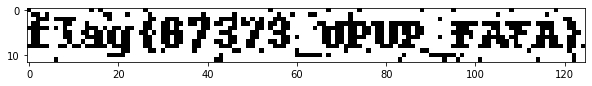

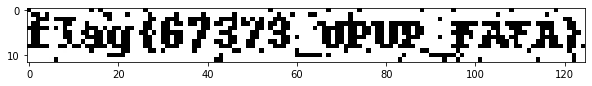

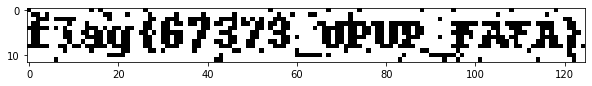

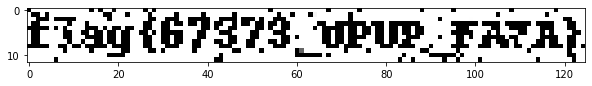

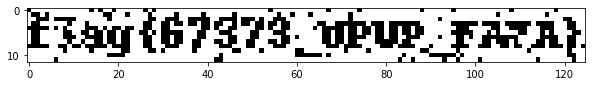

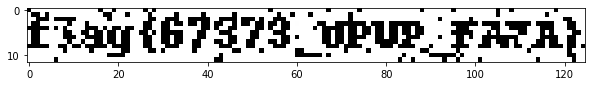

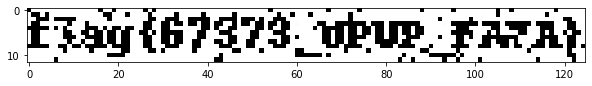

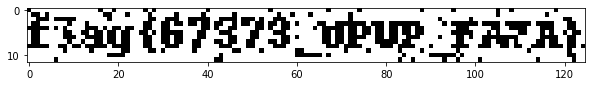

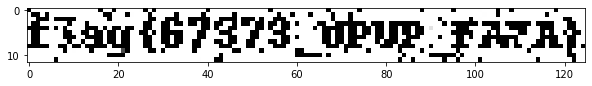

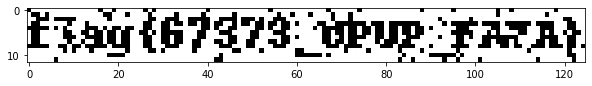

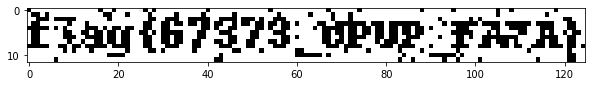

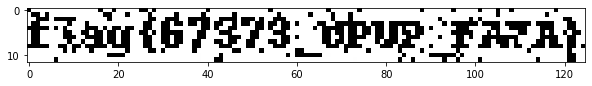

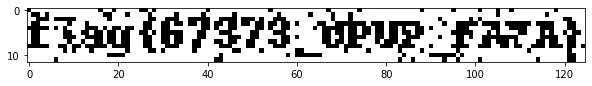

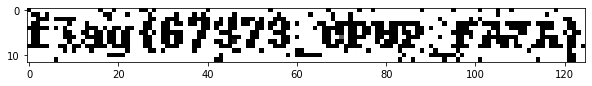

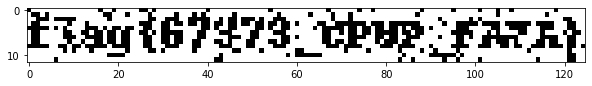

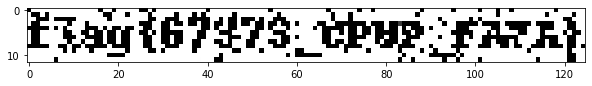

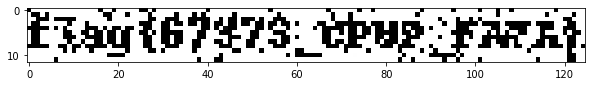

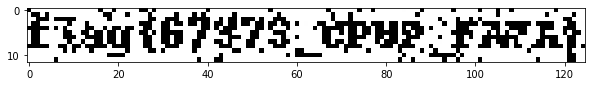

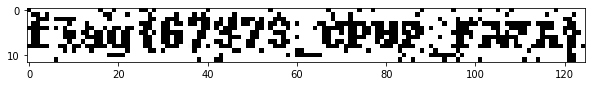

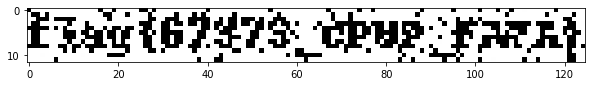

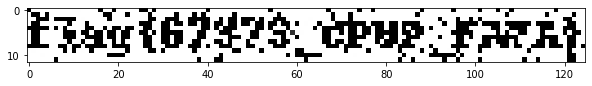

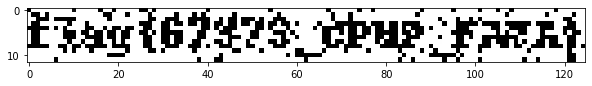

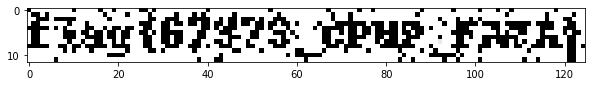

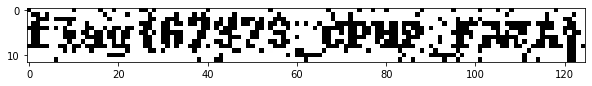

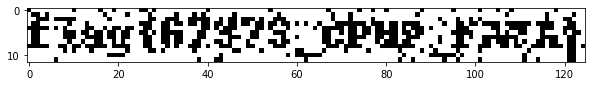

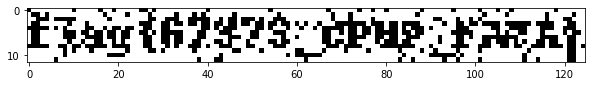

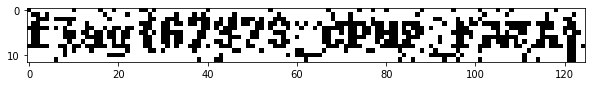

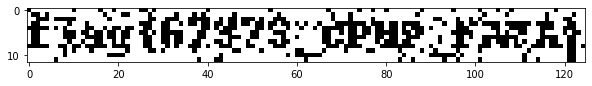

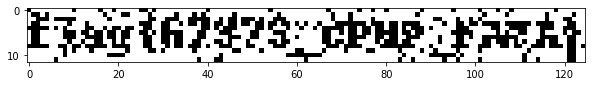

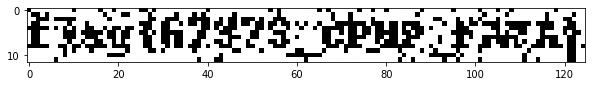

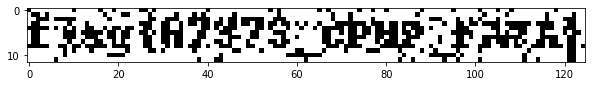

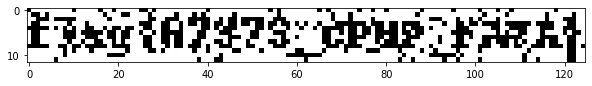

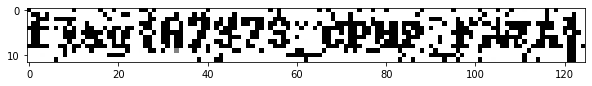

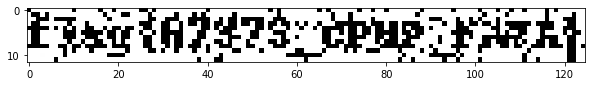

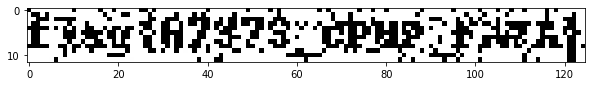

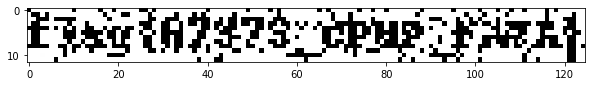

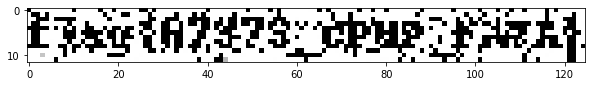

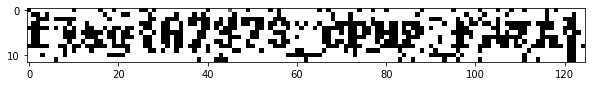

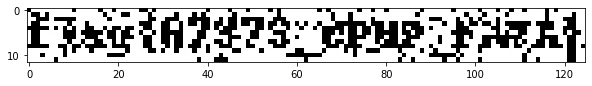

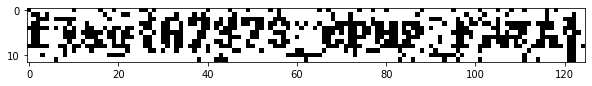

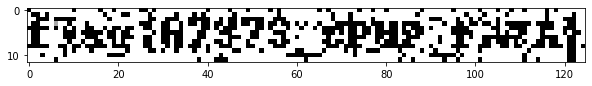

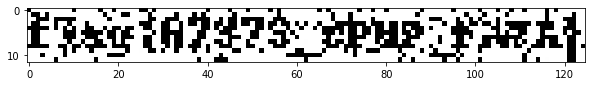

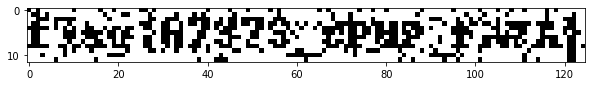

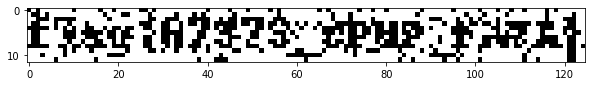

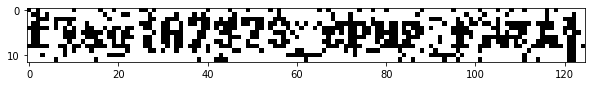

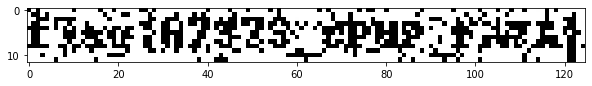

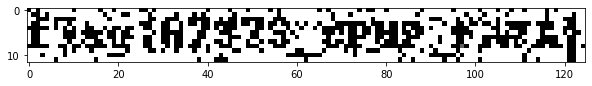

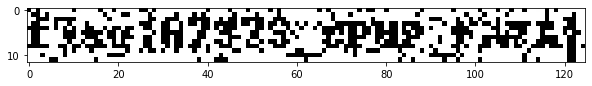

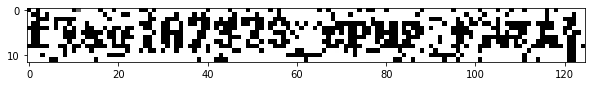

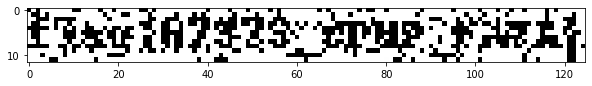

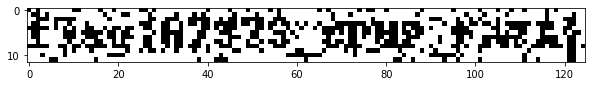

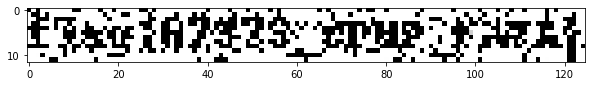

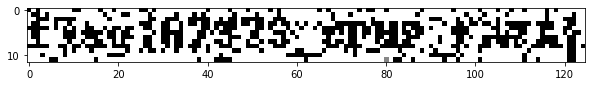

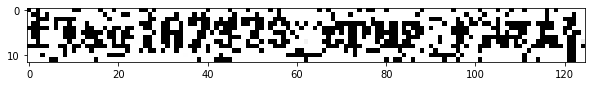

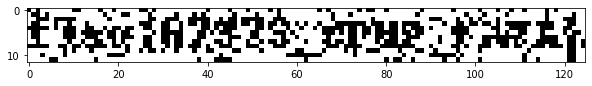

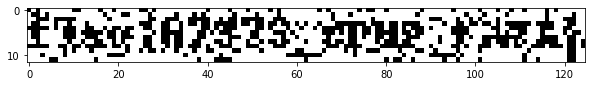

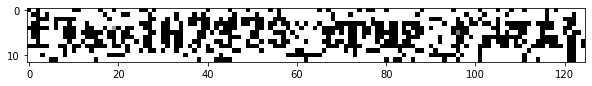

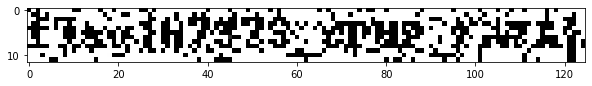

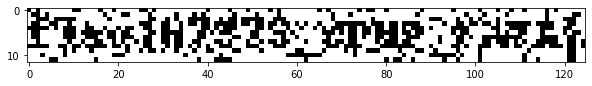

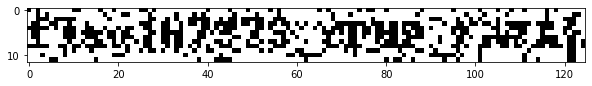

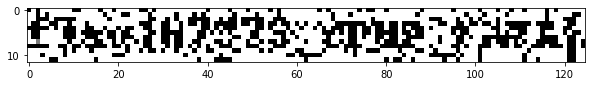

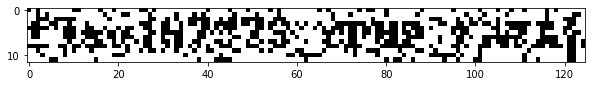

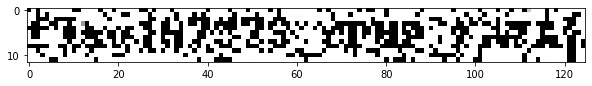

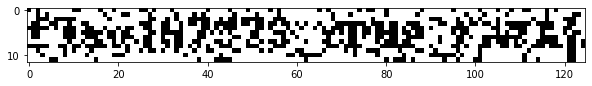

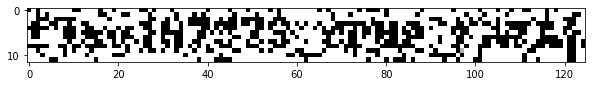

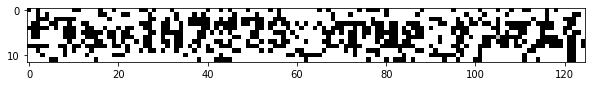

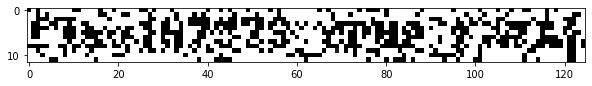

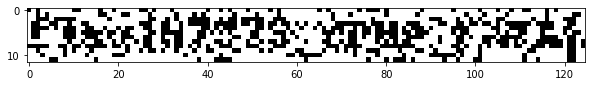

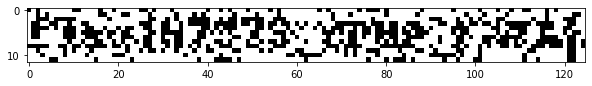

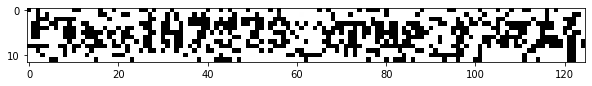

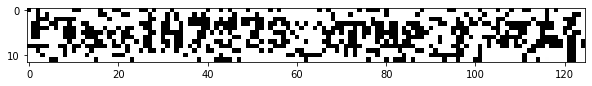

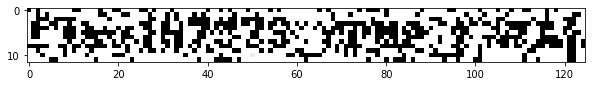

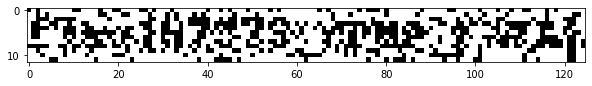

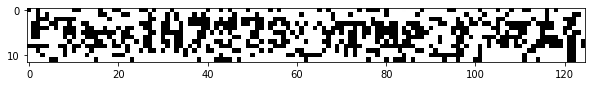

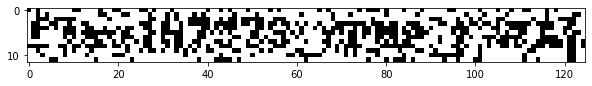

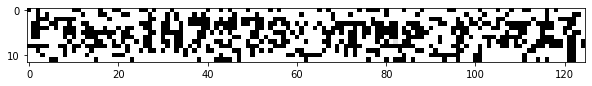

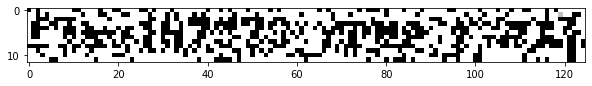

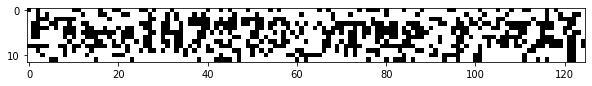

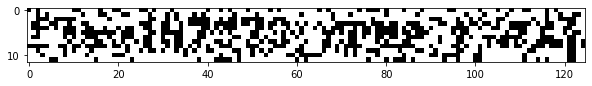

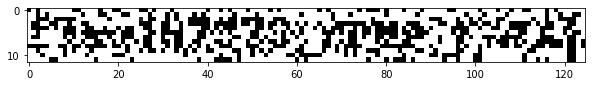

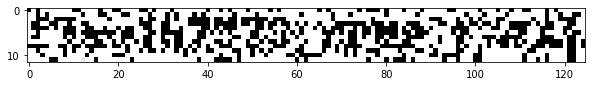

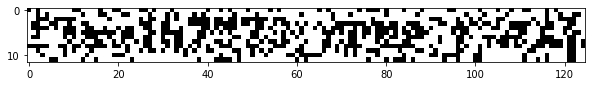

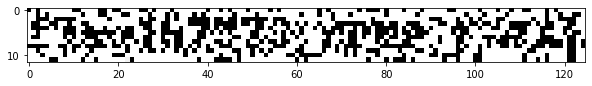

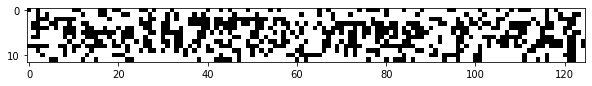

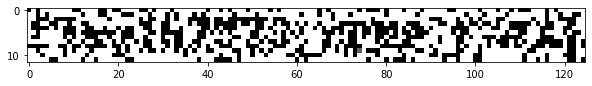

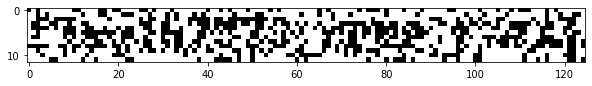

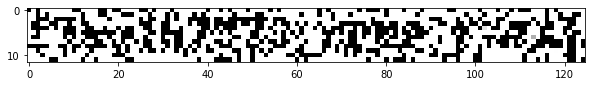

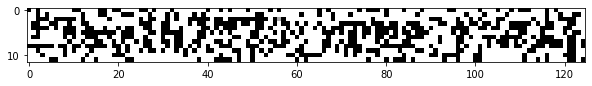

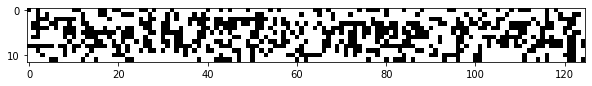

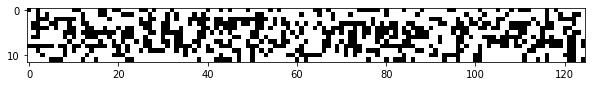

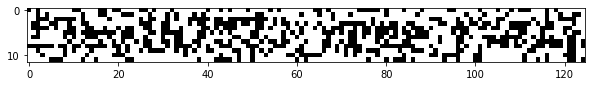

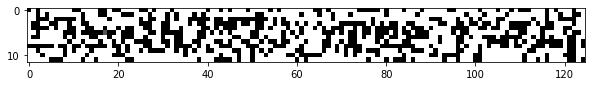

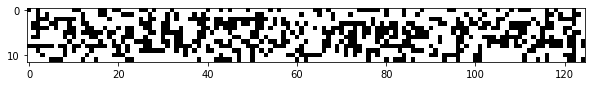

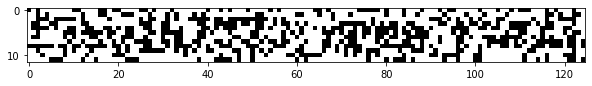

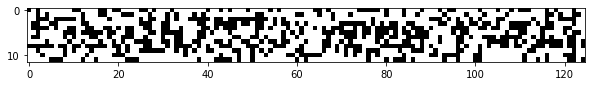

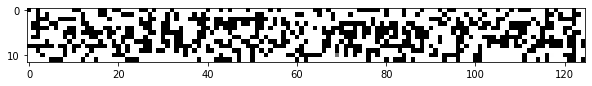

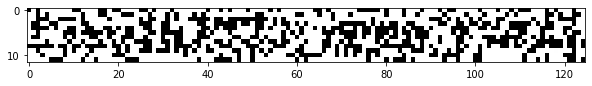

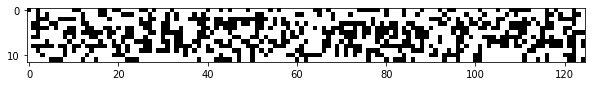

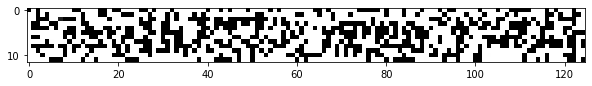

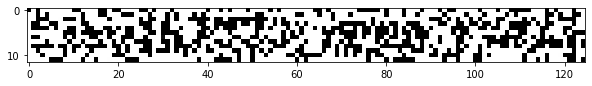

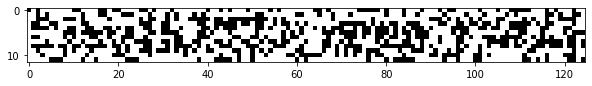

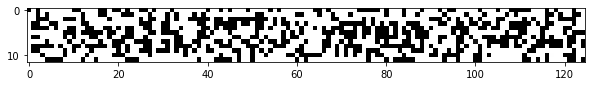

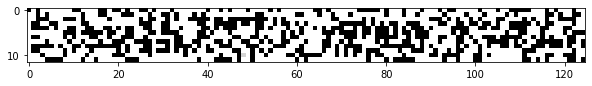

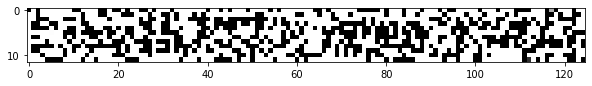

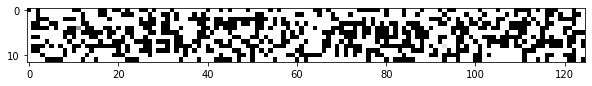

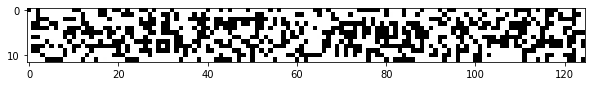

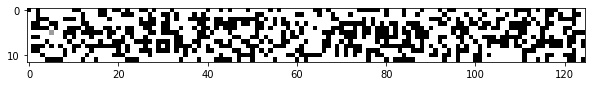

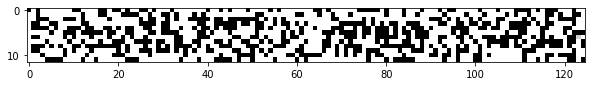

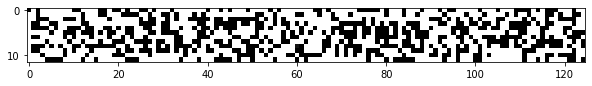

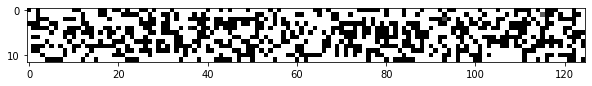

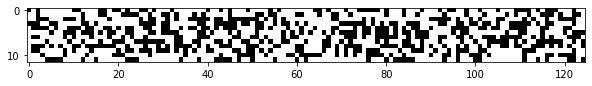

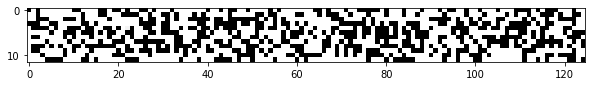

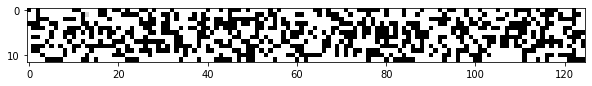

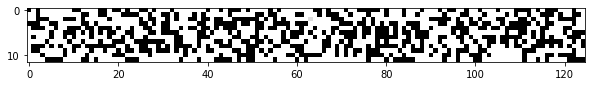

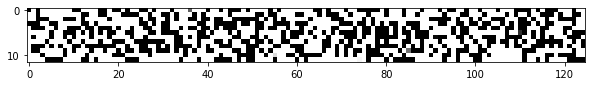

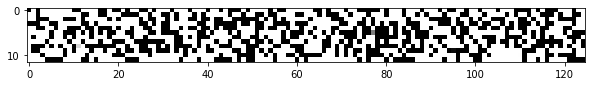

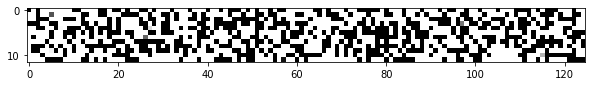

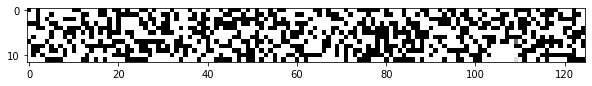

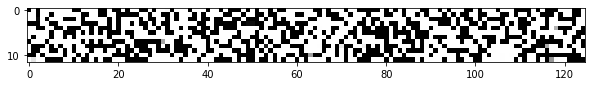

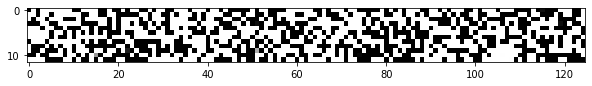

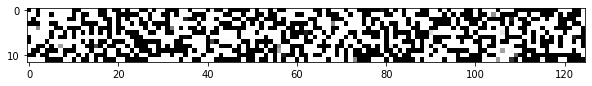

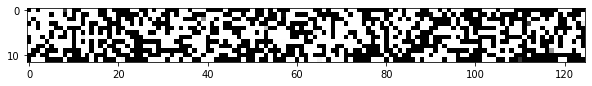

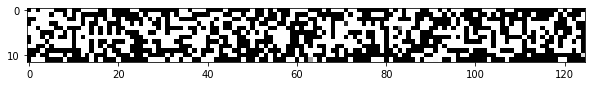

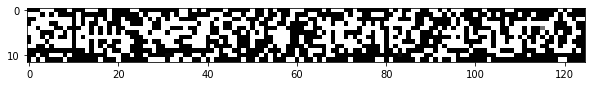

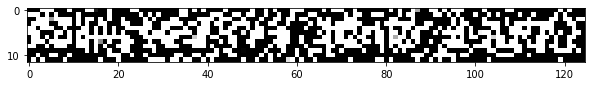

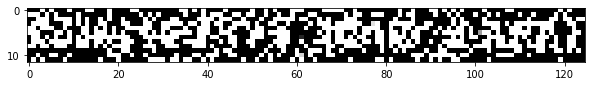

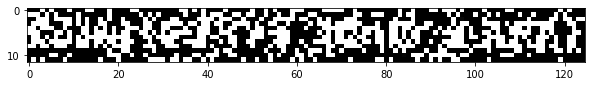

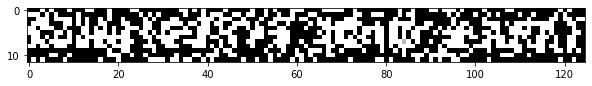

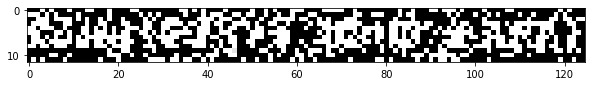

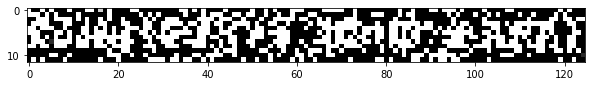

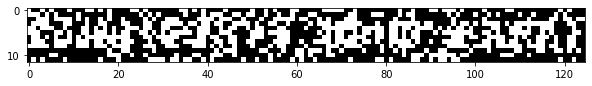

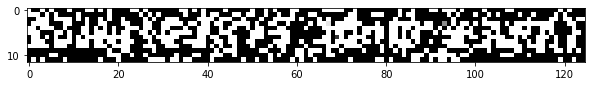

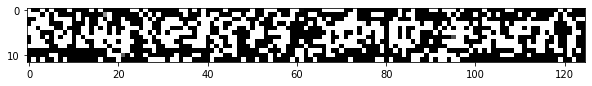

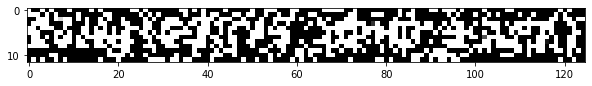

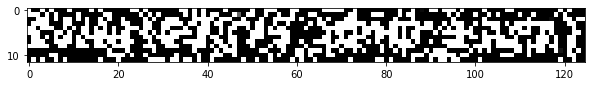

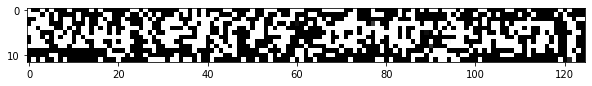

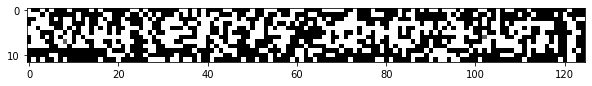

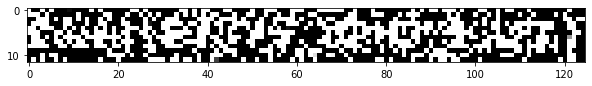

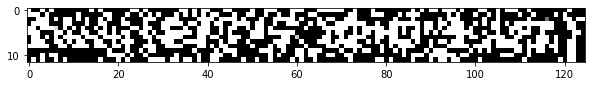

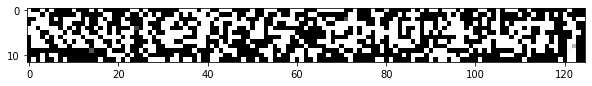

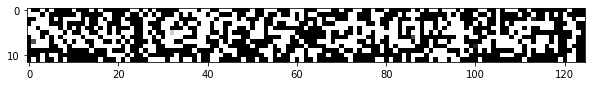

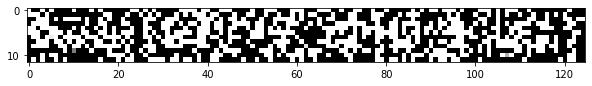

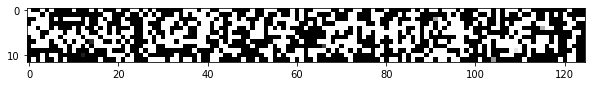

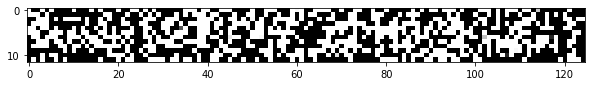

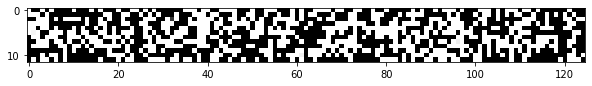

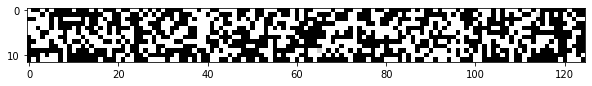

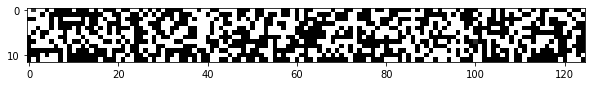

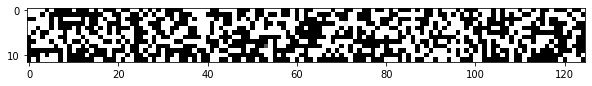

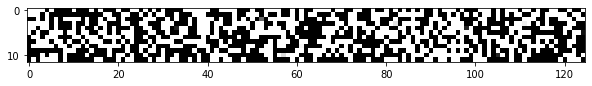

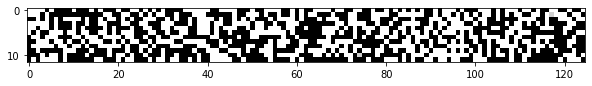

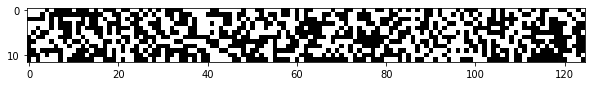

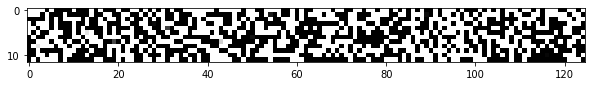

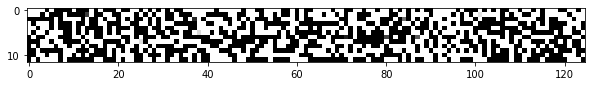

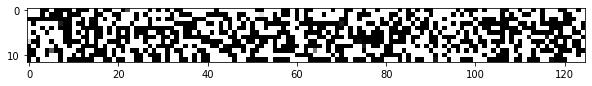

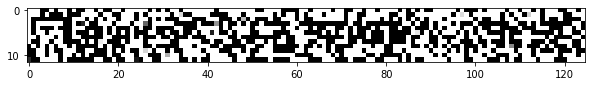

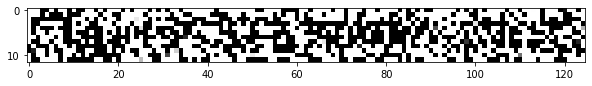

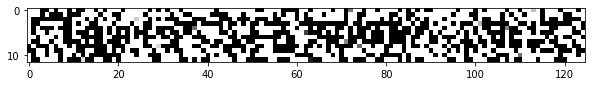

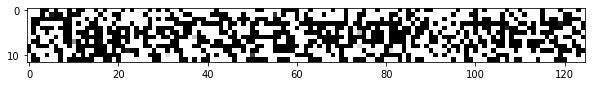

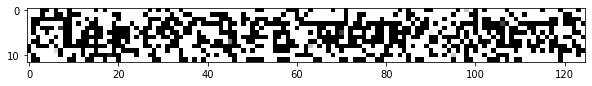

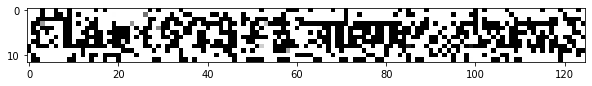

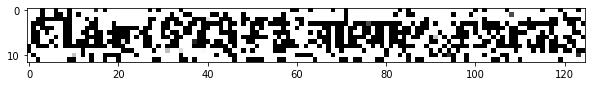

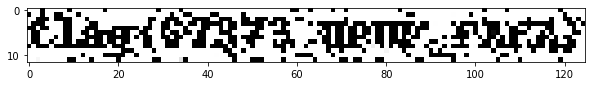

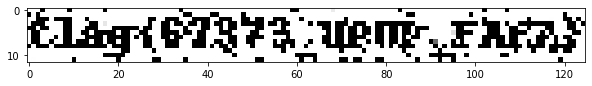

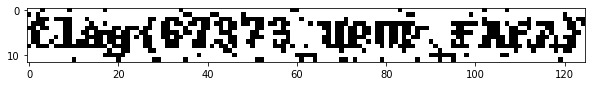

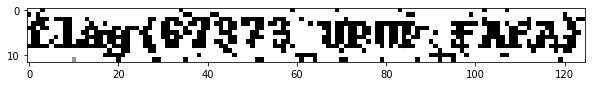

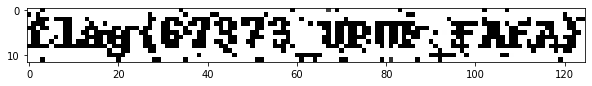

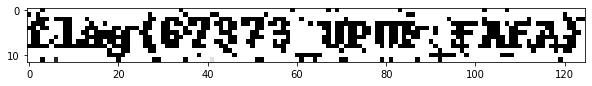

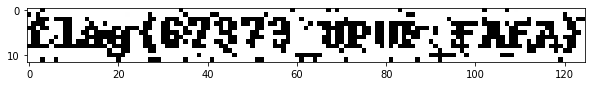

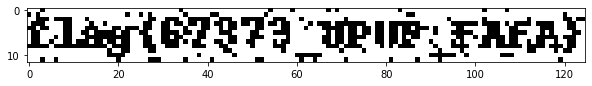

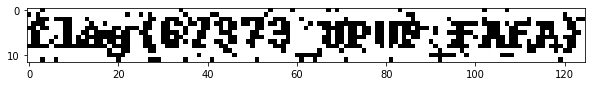

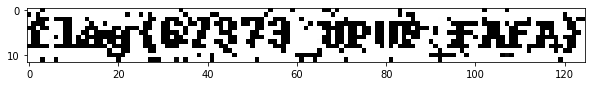

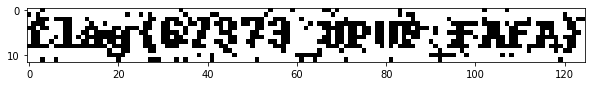

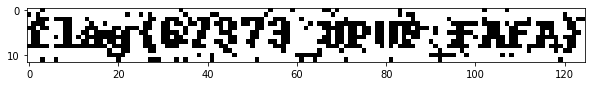

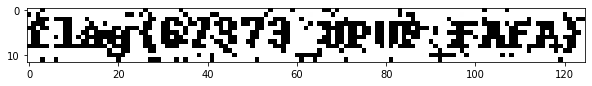

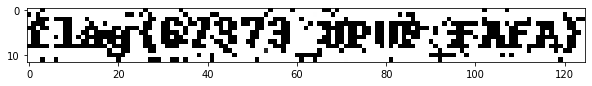

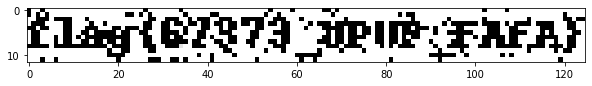

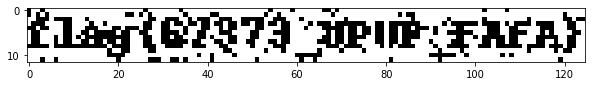

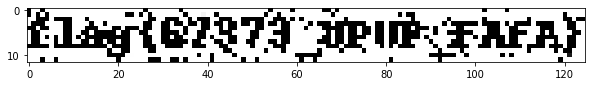

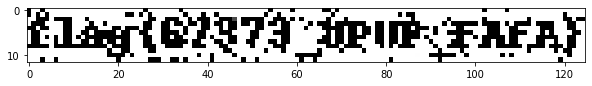

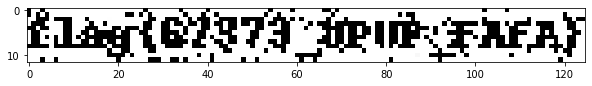

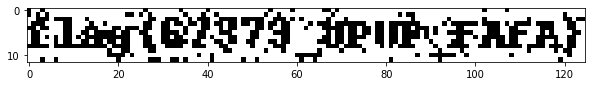

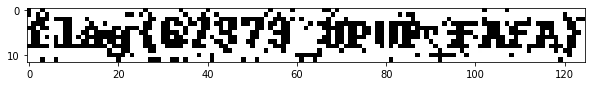

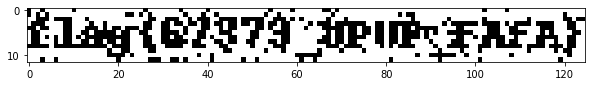

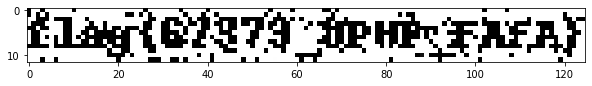

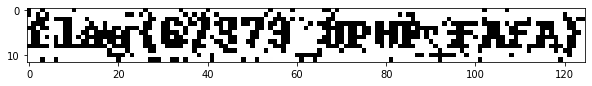

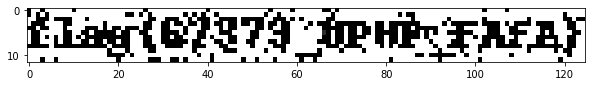

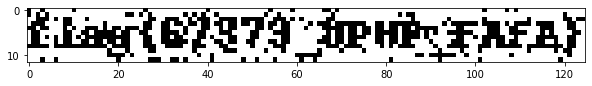

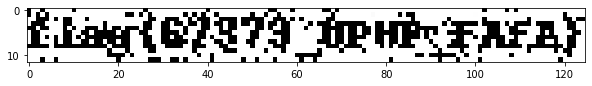

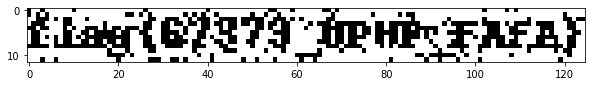

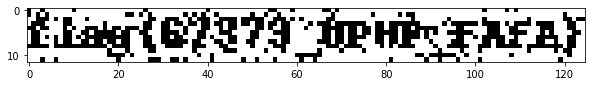

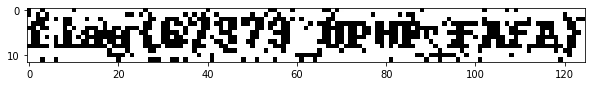

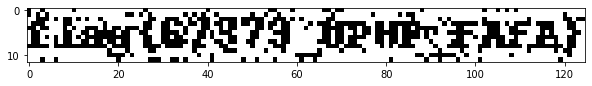

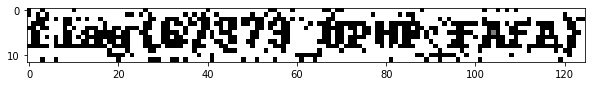

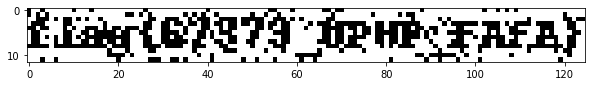

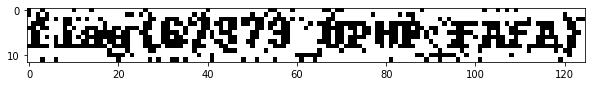

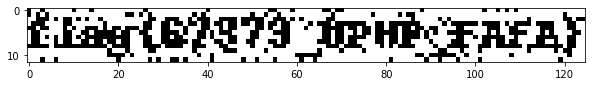

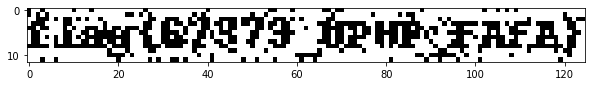

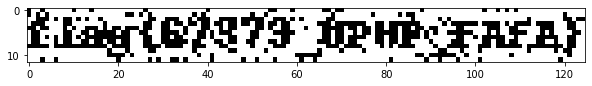

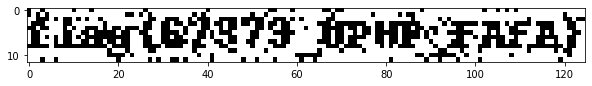

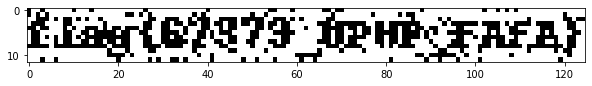

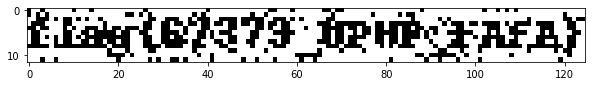

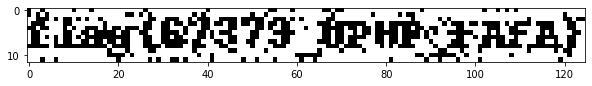

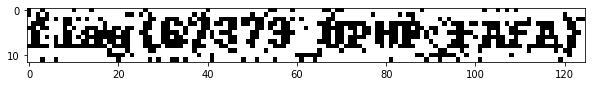

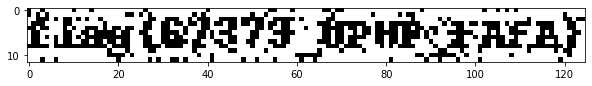

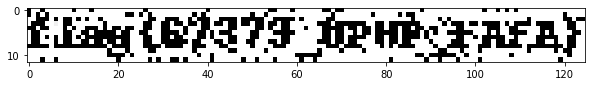

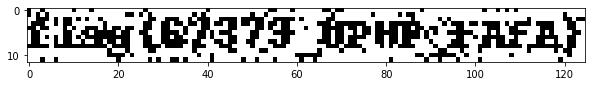

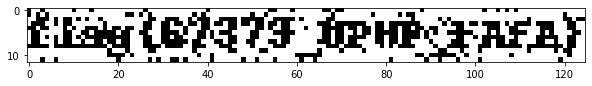

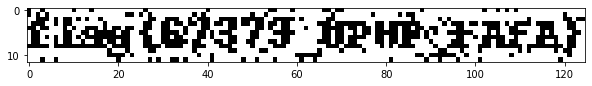

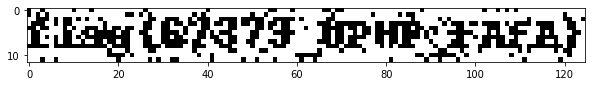

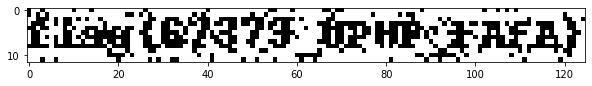

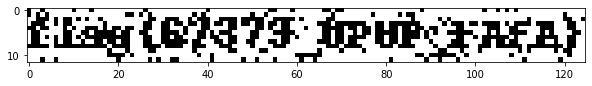

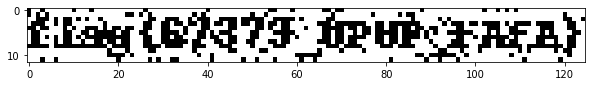

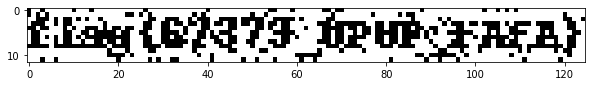

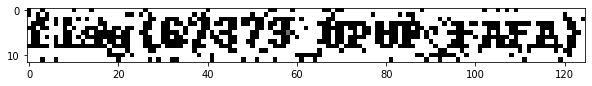

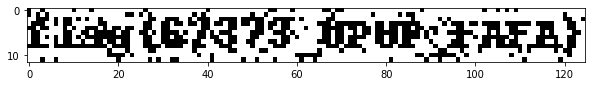

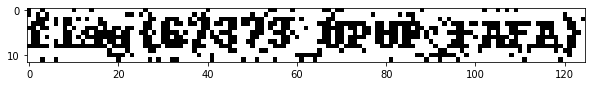

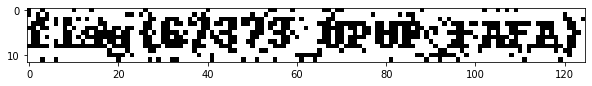

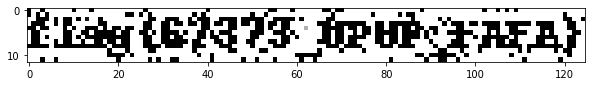

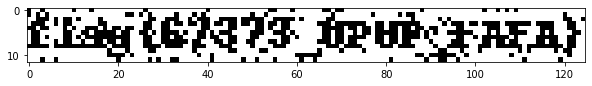

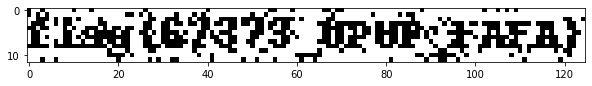

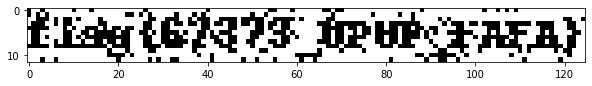

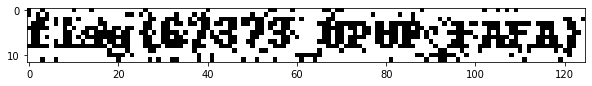

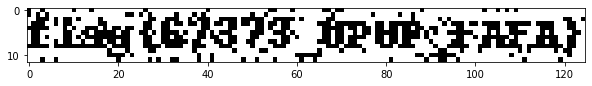

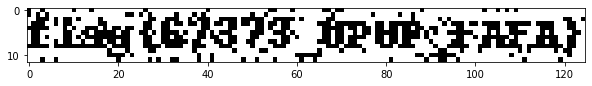

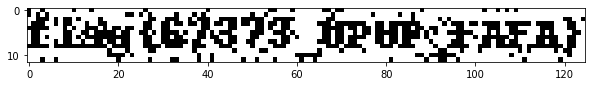

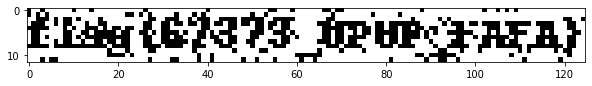

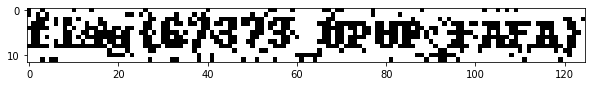

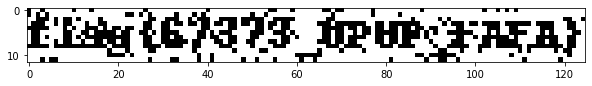

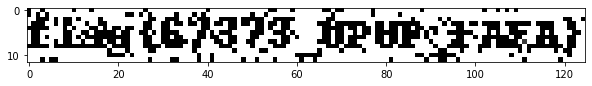

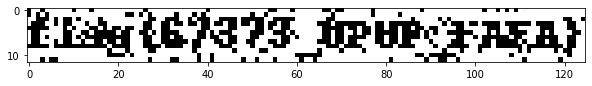

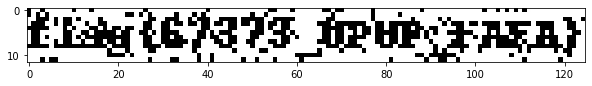

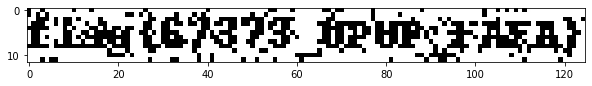

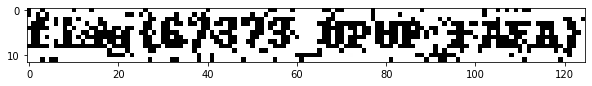

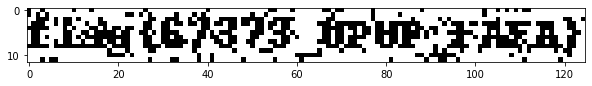

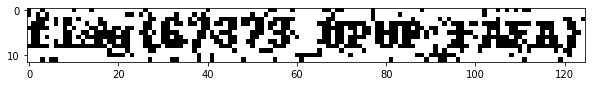

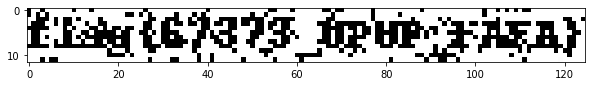

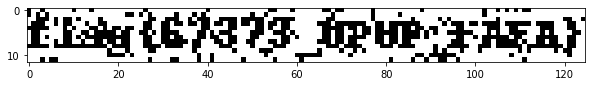

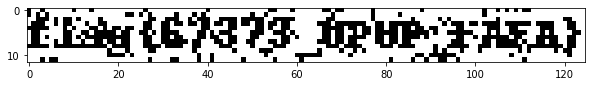

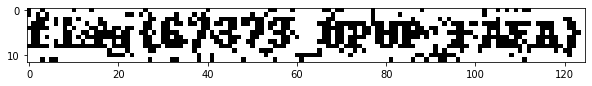

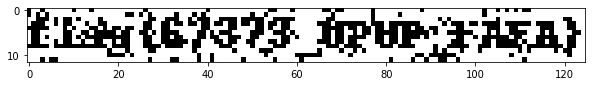

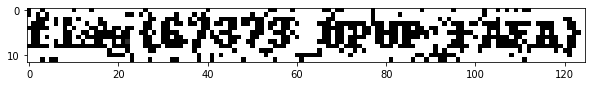

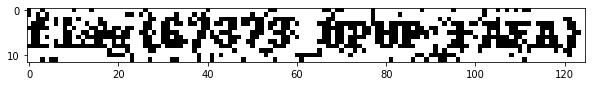

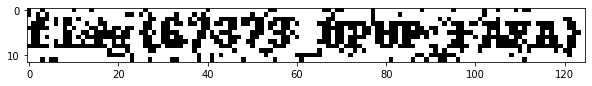

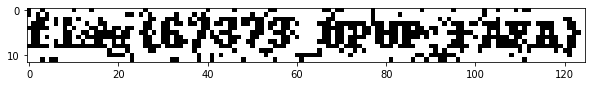

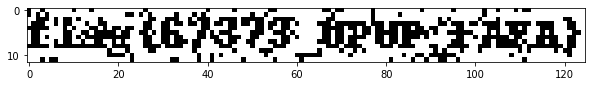

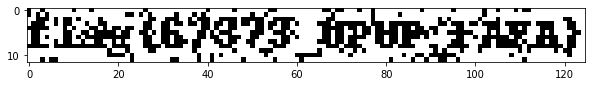

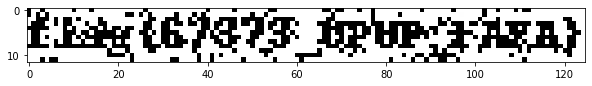

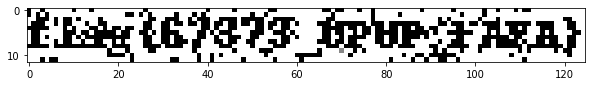

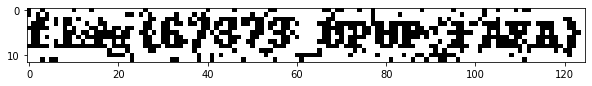

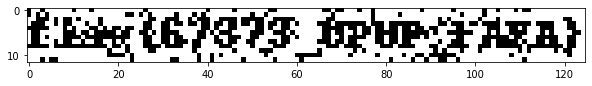

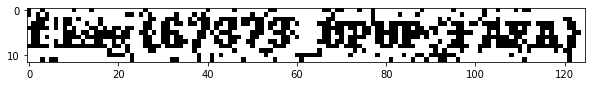

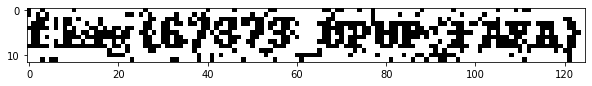

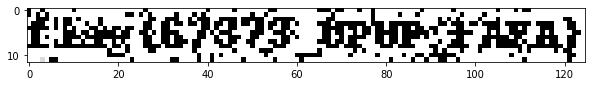

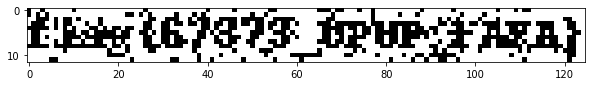

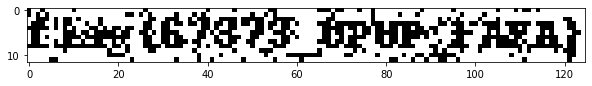

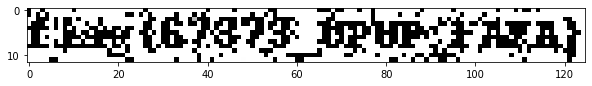

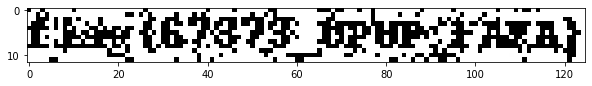

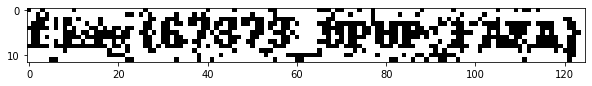

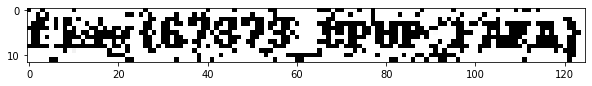

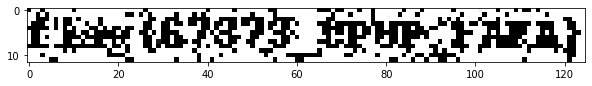

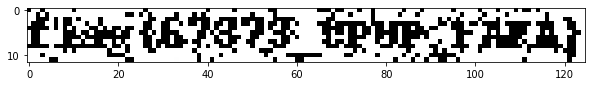

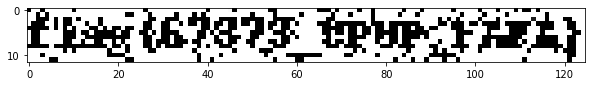

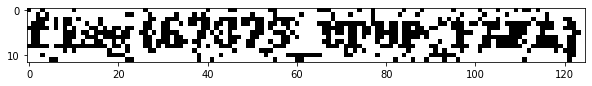

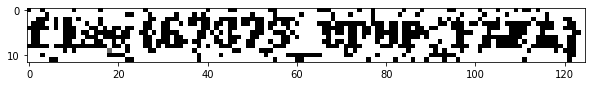

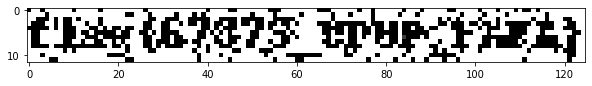

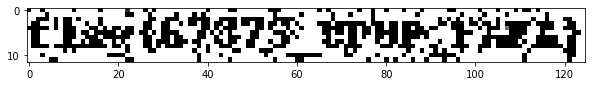

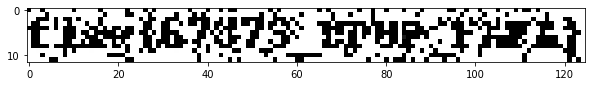

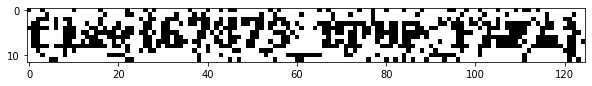

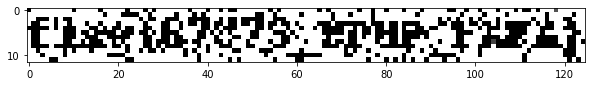

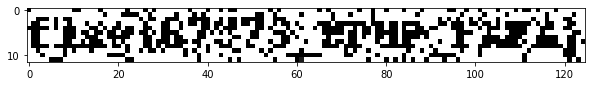

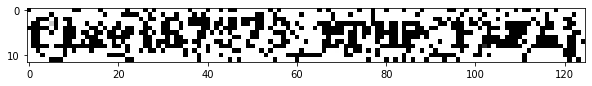

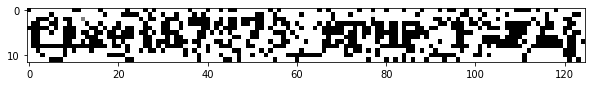

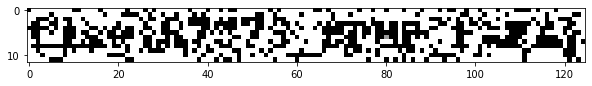

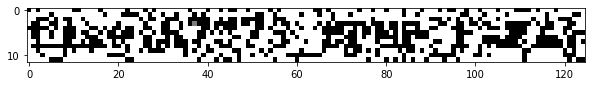

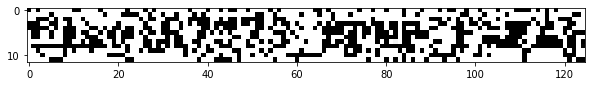

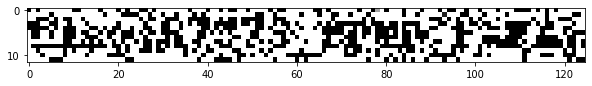

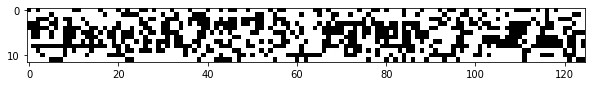

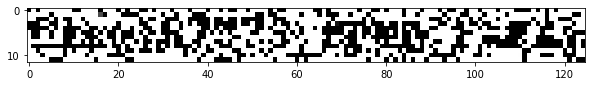

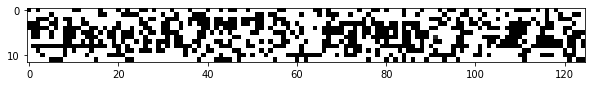

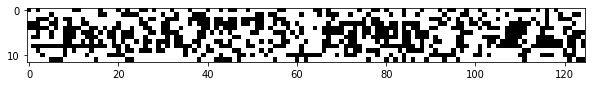

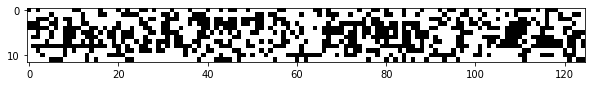

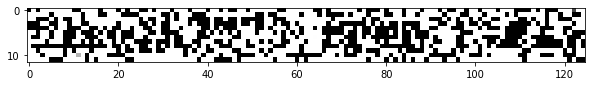

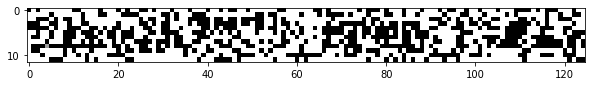

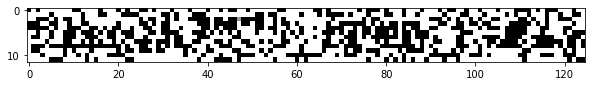

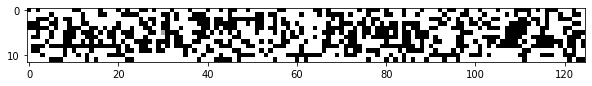

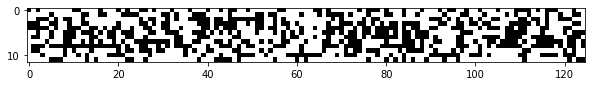

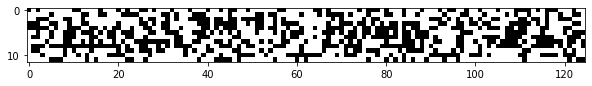

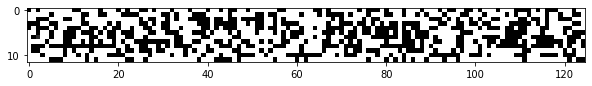

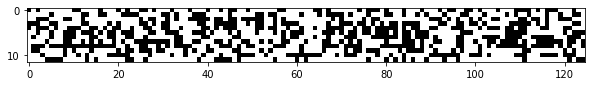

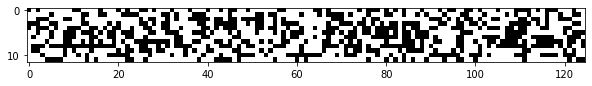

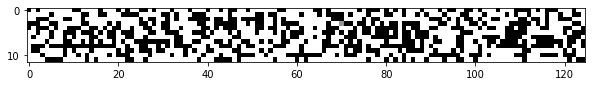

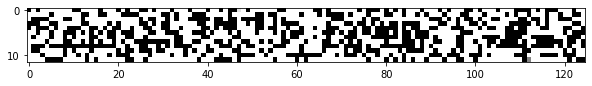

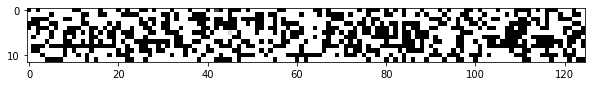

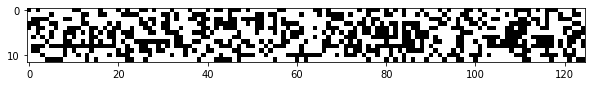

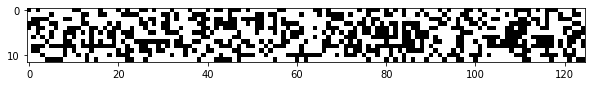

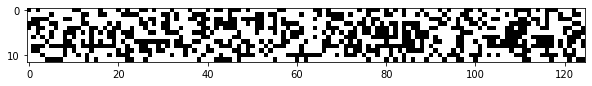

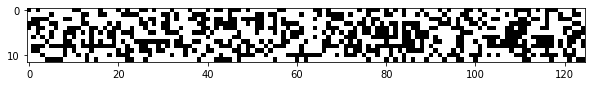

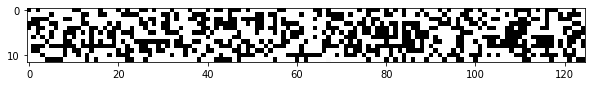

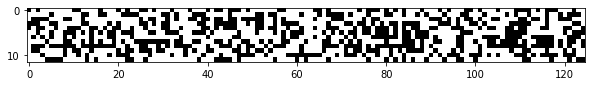

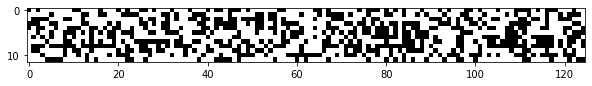

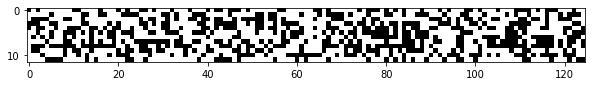

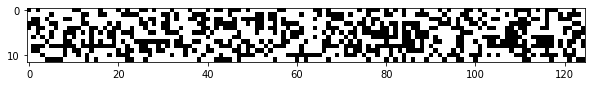

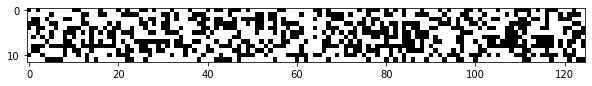

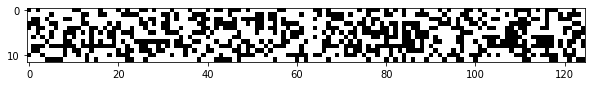

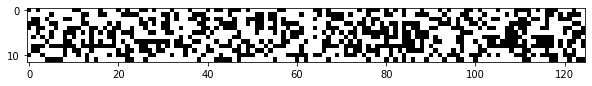

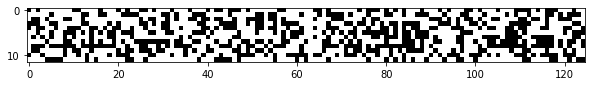

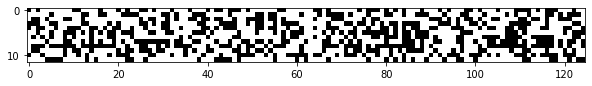

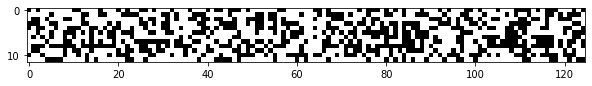

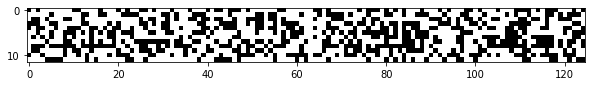

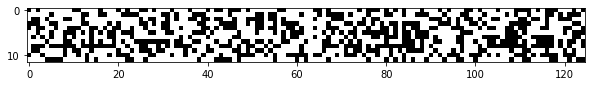

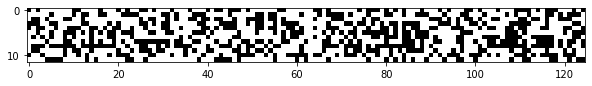

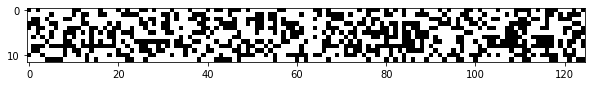

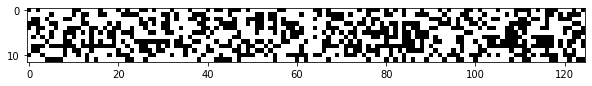

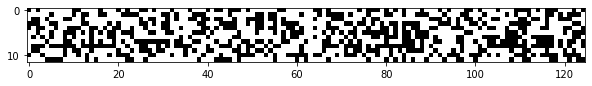

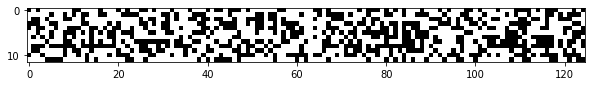

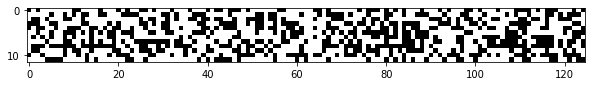

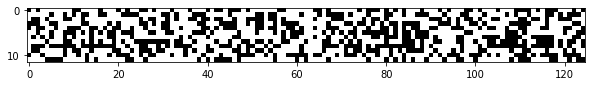

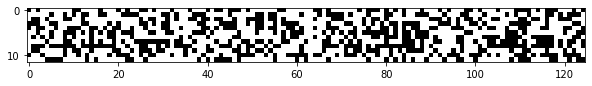

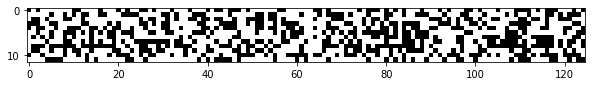

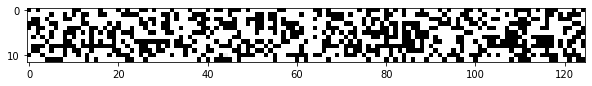

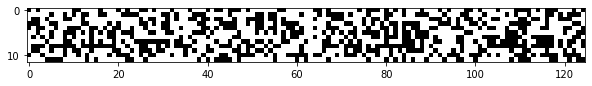

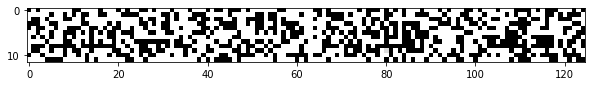

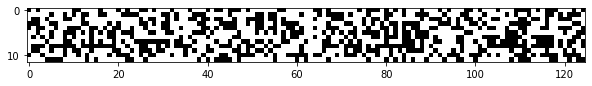

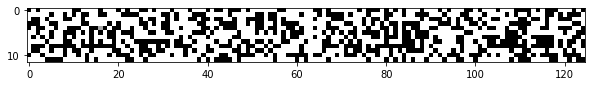

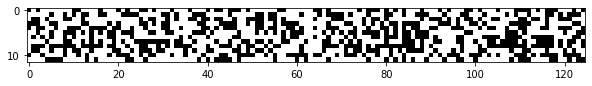

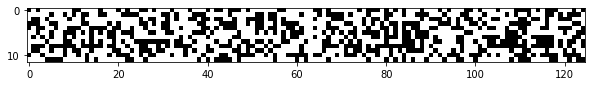

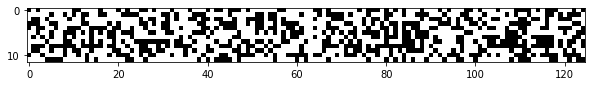

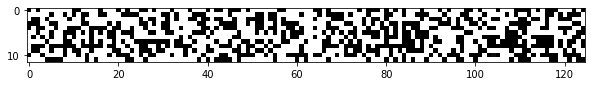

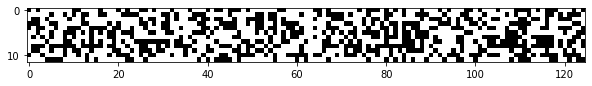

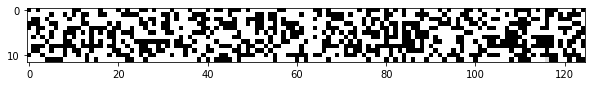

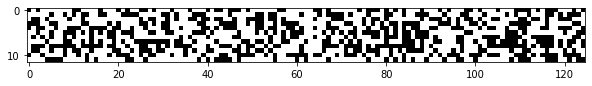

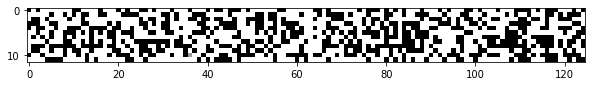

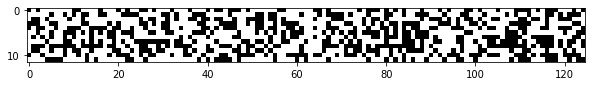

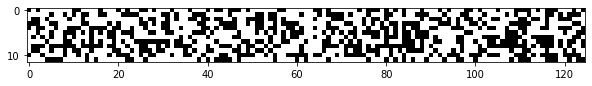

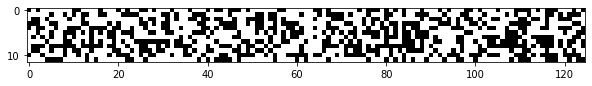

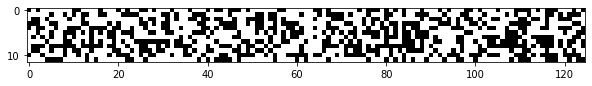

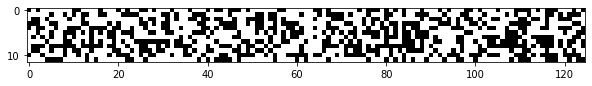

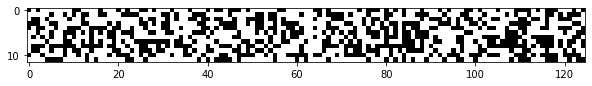

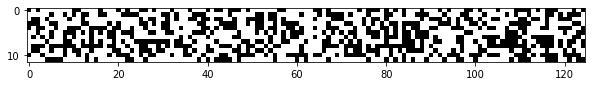

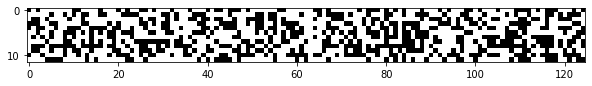

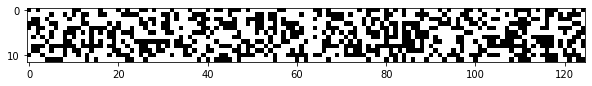

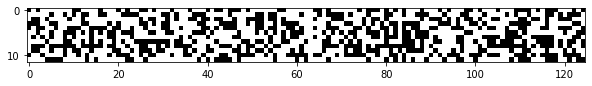

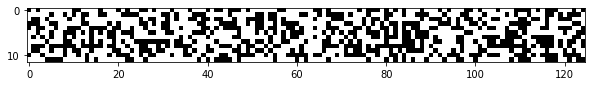

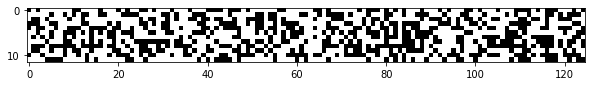

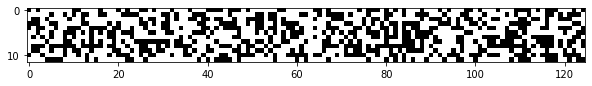

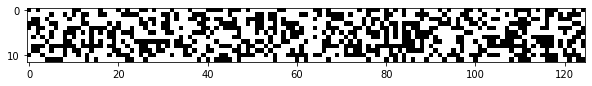

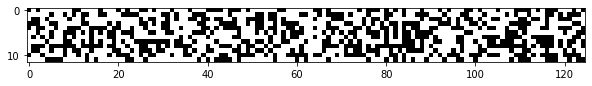

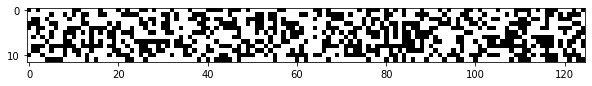

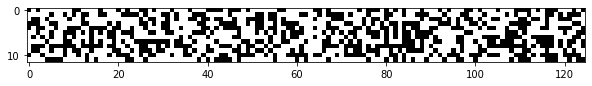

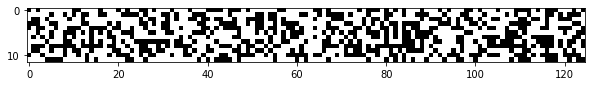

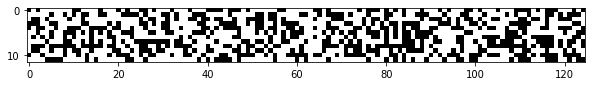

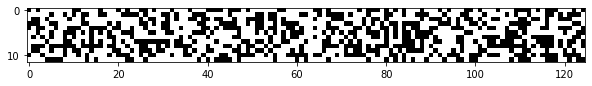

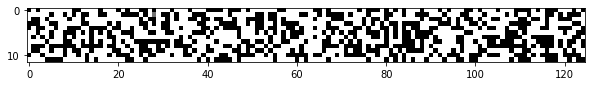

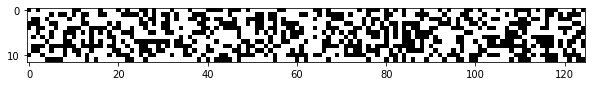

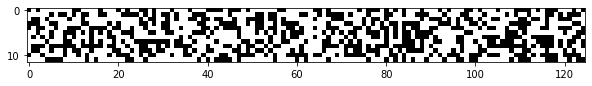

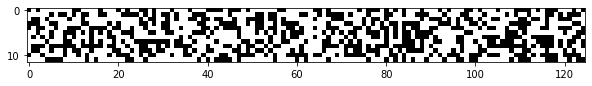

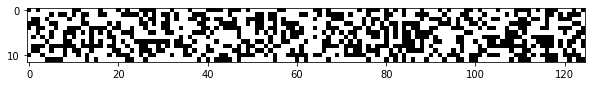

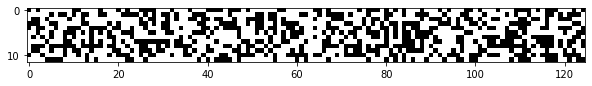

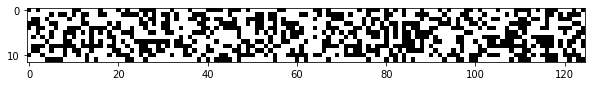

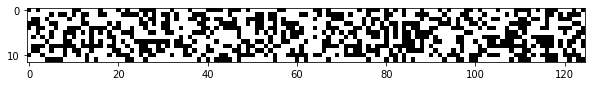

KeyboardInterrupt: 

In [15]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms,utils

num_epochs = 50000
criterion = nn.BCELoss()
def denorm(x):
    out = (x+1)/2
    return out #clamp：取（0,1）范围内的数值，即“掐头去尾”

def reset_grad(): #梯度双清
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

total_step = len(data_loader)
for epoch in trange(num_epochs):
    for i, images in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        real_labels = torch.ones(batch_size, 1).to(device)  # 定义真标签，全1，shape（100，1）
        fake_labels = torch.zeros(batch_size, 1).to(device)  # 定义假标签，全0，shape（100,1）
    
        '''-------------
        |   训练判别器   |
        --------------'''
        outputs = D(images) #前项
        d_loss_real = criterion(outputs, real_labels)  #损失计算
        real_score = outputs
        
        '''随机->生成器'''
        z = torch.randn(batch_size, image_size).to(device)  # 设置随机种子z，shape(100,64)
        fake_images = G(z)  # 随机种子喂入生成器，形成假图
        
        '''假图->判别器'''
        outputs = D(denorm(fake_images))  # 利用判别器，计算假图输出
        d_loss_fake = criterion(outputs, fake_labels)  # 计算判别器假图输出和假标签损失
        fake_score = outputs
        
        '''判别优化'''
        d_loss = d_loss_fake+d_loss_real  # 计算损失和
        reset_grad()  # 梯度归零，在反向传播之前，使用optimizer将它要更新的所有张量的梯度清零(这些张量是模型可学习的权重)
        d_loss.backward()  # 梯度反向传播
        d_optimizer.step()  # 单步优化，调用optimizer的step函数更新所有参数


        '''-------------
        |   训练生成     |
        --------------'''       
        z = torch.randn(batch_size, image_size).to(device)  # 生成随机种子
        fake_images = G(z)  # 随机种子喂入生成器
        outputs = D(denorm(fake_images))  # 判别器判别假图输出
        g_loss = criterion(outputs, real_labels)  # 判别器假图输出和真标签损失
        reset_grad()  # 梯度归零
        g_loss.backward()  # 反向传播
        g_optimizer.step()  # 优化
    
    if (epoch+1) == 1:
        images = images[0].reshape(ih, iw)
        img = utils.make_grid(images.cpu(),1)
        img = img.numpy().transpose(1,2,0)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.show()
    
    if epoch %10 == 0:

        fake_images = fake_images[0].reshape(ih, iw)
        img = utils.make_grid(fake_images.cpu(),1)
        img = img.detach().numpy().transpose(1,2,0) 
        plt.figure(figsize=(10,10))
        plt.imshow(denorm(img))
        plt.show()



